In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
intro=pd.read_csv('Intro.csv')
inc=pd.read_csv('incidence_rate.csv')
sch=pd.read_csv("Schedule.csv")
rep=pd.read_csv("report.csv")
cov=pd.read_csv("Coverage_data.csv")

### SCENARIO

In [5]:
#1. A government health agency wants to identify regions with low vaccination coverage
# to allocate resources effectively.
Merge_data=pd.merge(cov,intro, how='inner')

In [7]:
Merge_data.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,ISO_3_CODE,COUNTRYNAME,WHO_REGION,DESCRIPTION,INTRO
0,0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,1044.0,945.0,90.52,AFG,Afghanistan,EMRO,aP (acellular pertussis) vaccine,No
1,1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,1044.0,945.0,90.52,AFG,Afghanistan,EMRO,Hepatitis A vaccine,No
2,2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52,AFG,Afghanistan,EMRO,Hepatitis B vaccine,Yes
3,3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,1219.0,1008.0,90.52,AFG,Afghanistan,EMRO,HepB birth dose,Yes
4,4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69,AFG,Afghanistan,EMRO,Hib (Haemophilus influenzae type B) vaccine,Yes


In [9]:
Merge_data.isnull().sum()

Unnamed: 0                       0
GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
ISO_3_CODE                       0
COUNTRYNAME                      0
WHO_REGION                       0
DESCRIPTION                      0
INTRO                            0
dtype: int64

In [23]:
Merge_data.shape

(3505, 17)

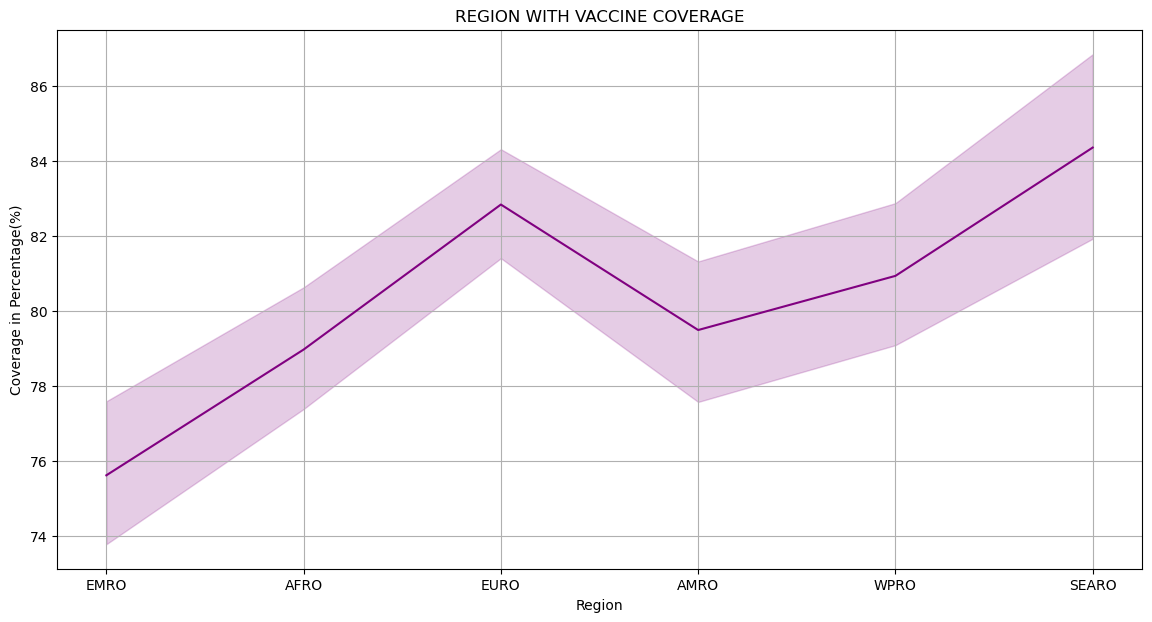

In [25]:
plt.figure(figsize=(14,7))
sns.lineplot(x="WHO_REGION",y="COVERAGE",data=Merge_data,color="purple")
plt.xlabel("Region")
plt.ylabel("Coverage in Percentage(%)")
plt.title("REGION WITH VACCINE COVERAGE")
plt.grid()
plt.show()

In [36]:
#2. A public health organization wants to evaluate the effectiveness of a measles
#vaccination campaign launched five years ago.
inc.shape

(84945, 9)

In [38]:
inc.isnull().sum()

Unnamed: 0             0
GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
DENOMINATOR            0
INCIDENCE_RATE         0
dtype: int64

In [48]:
measles=inc[inc['DISEASE']=='MEASLES']

In [50]:
measles.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
3,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",9.3
15,15,COUNTRIES,ABW,Aruba,2022.0,MEASLES,Measles,"per 1,000,000 total population",0.0
27,27,COUNTRIES,ABW,Aruba,2021.0,MEASLES,Measles,"per 1,000,000 total population",0.0
39,39,COUNTRIES,ABW,Aruba,2019.0,MEASLES,Measles,"per 1,000,000 total population",9.3
50,50,COUNTRIES,ABW,Aruba,2018.0,MEASLES,Measles,"per 1,000,000 total population",0.0


In [52]:
measles.shape

(9196, 9)

In [74]:

five_year = inc[(inc["YEAR"] >= 2018) & (inc["YEAR"] <= 2023)]


In [76]:
five_year.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",9.3
4,4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0


In [78]:
five_year.shape

(15709, 9)

In [86]:
merge_data_measles=pd.merge(five_year,measles,how="inner")

In [88]:
merge_data_measles.shape

(1276, 9)

In [96]:
merge_data_measles.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",9.3
1,15,COUNTRIES,ABW,Aruba,2022.0,MEASLES,Measles,"per 1,000,000 total population",0.0
2,27,COUNTRIES,ABW,Aruba,2021.0,MEASLES,Measles,"per 1,000,000 total population",0.0
3,39,COUNTRIES,ABW,Aruba,2019.0,MEASLES,Measles,"per 1,000,000 total population",9.3
4,50,COUNTRIES,ABW,Aruba,2018.0,MEASLES,Measles,"per 1,000,000 total population",0.0


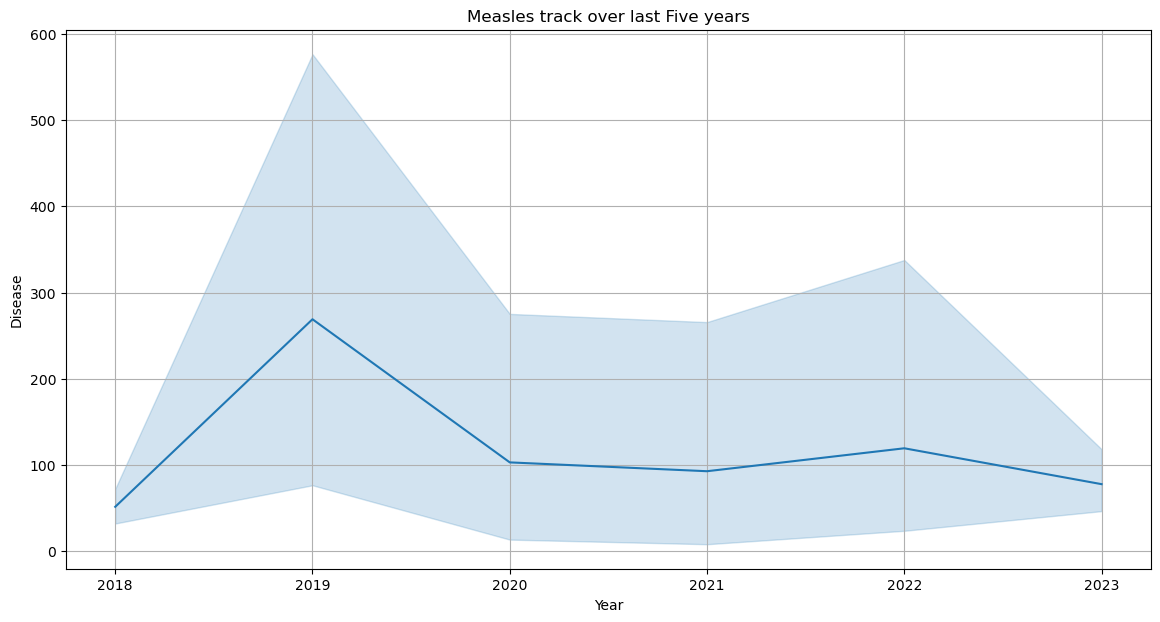

In [100]:
plt.figure(figsize=(14,7))
sns.lineplot(x="YEAR",y="INCIDENCE_RATE",data=merge_data_measles)
plt.xlabel("Year")
plt.ylabel("Disease")
plt.title("Measles track over last Five years")
plt.grid()
plt.show()

In [104]:
# 3. A vaccine manufacturer wants to estimate vaccine demand for a specific disease in the
# upcoming year
rep.head()

,Unnamed: 0.1,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,0,0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,1,1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,2,2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,3,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,1.0
4,4,4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0


In [106]:
rep.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
CASES                  0
dtype: int64

In [108]:
rep.shape

(84869, 9)

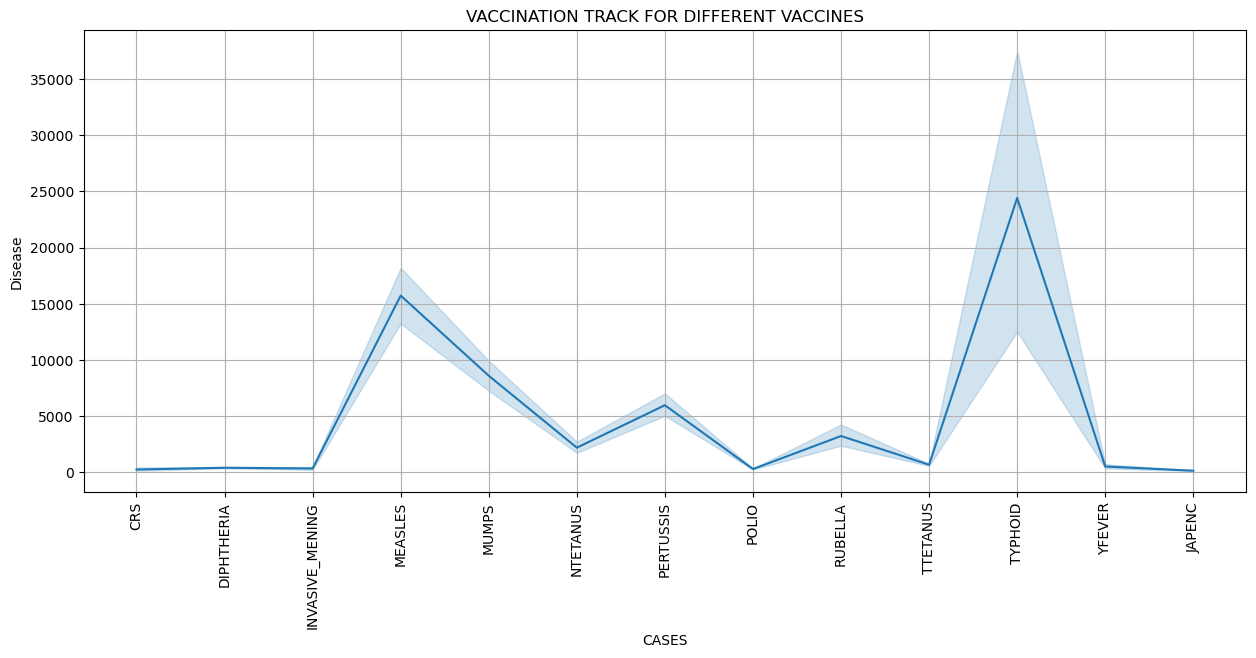

In [136]:
plt.figure(figsize=(15,6))
sns.lineplot(x="DISEASE",y="CASES",data=rep)
plt.xlabel("CASES")
plt.ylabel("Disease")
plt.title("VACCINATION TRACK FOR DIFFERENT VACCINES")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [11]:
#4 A sudden outbreak of influenza occurs in a specific region, and authorities need to ramp up vaccination efforts
cov['ANTIGEN']

0             BCG
1             BCG
2         DIPHCV4
3         DIPHCV4
4         DIPHCV5
           ...   
399854       MCV1
399855        PAB
399856       POL3
399857       RCV1
399858       RCV1
Name: ANTIGEN, Length: 399859, dtype: object

In [13]:
cov['ANTIGEN'].value_counts()

ANTIGEN
DTPCV3      26015
POL3        26005
MCV1        25939
BCG         24289
HEPB3       22249
            ...  
JAPENC_1      229
JAPENC_C      211
MALARIA3      158
MALARIA4      158
MALARIA1      158
Name: count, Length: 69, dtype: int64

In [41]:

get_influenza = cov[cov['ANTIGEN'].isin(['FLU_ALL', 'FLU_CHILD1', 'FLU_CHILD2', 'FLU_CHRONIC_ADULT', 'FLU_CHRONIC_PED', 'FLU_ELDERLY', 'FLU_HCW', 'FLU_OTHER', 'FLU_PW', 'FLU_RESIDENT'])]

In [45]:

get_influenza.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,get_influenza
12,12,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True
13,13,COUNTRIES,ABW,Aruba,2023.0,FLU_CHILD1,Influenza child age group 1,ADMIN,Administrative coverage,945.0,896.0,94.81,True
14,14,COUNTRIES,ABW,Aruba,2023.0,FLU_CHILD2,Influenza child age group 2,ADMIN,Administrative coverage,945.0,896.0,94.81,True
15,15,COUNTRIES,ABW,Aruba,2023.0,FLU_CHRONIC_ADULT,Influenza chronic adult,ADMIN,Administrative coverage,945.0,896.0,94.81,True
16,16,COUNTRIES,ABW,Aruba,2023.0,FLU_CHRONIC_PED,Influenza chronic pediatric,ADMIN,Administrative coverage,945.0,896.0,94.81,True


In [47]:

get_influenza = get_influenza.loc[:, ~get_influenza.columns.str.contains('^Unnamed')]


In [49]:
merge_data_inflenza=pd.merge(get_influenza,inc,how='left')

In [51]:
inf=pd.merge(merge_data_inflenza,inc,how='inner')

In [53]:
# Drop columns that have 'Unnamed' in their name
inf = inf.loc[:, ~inf.columns.str.contains('^Unnamed')]


In [55]:
inf.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,get_influenza,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True,MEASLES,Measles,"per 1,000,000 total population",9.3
4,COUNTRIES,ABW,Aruba,2023.0,FLU_ALL,Influenza all persons above >6 months (univers...,ADMIN,Administrative coverage,945.0,896.0,94.81,True,MUMPS,Mumps,"per 1,000,000 total population",0.0


In [57]:
inf.isnull().sum()

GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
get_influenza                    0
DISEASE                          0
DISEASE_DESCRIPTION              0
DENOMINATOR                      0
INCIDENCE_RATE                   0
dtype: int64

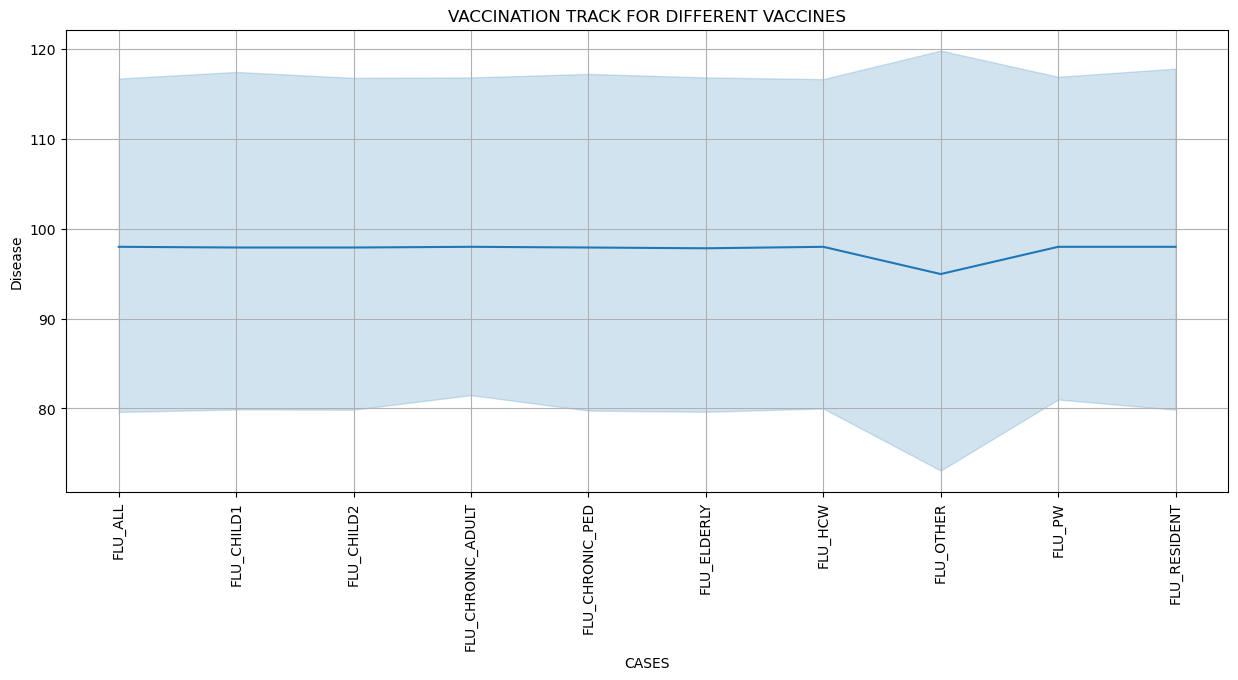

In [62]:
plt.figure(figsize=(15,6))
sns.lineplot(x="ANTIGEN",y="INCIDENCE_RATE",data=inf)
plt.xlabel("CASES")
plt.ylabel("Disease")
plt.title("VACCINATION TRACK FOR DIFFERENT VACCINES")
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#5 Researchers want to explore the incidence rates of polio in populations with no vaccination coverage.


In [29]:
inc.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",9.3
4,4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0


In [64]:
get_POLIO = inc[inc['DISEASE']=='POLIO']

In [72]:
zero_cov=cov[cov['COVERAGE']==0]

In [74]:
zero_cov.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,get_influenza
3097,3097,COUNTRIES,AGO,Angola,2017.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",ADMIN,Administrative coverage,987965.0,0.0,0.0,False
3098,3098,COUNTRIES,AGO,Angola,2017.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",OFFICIAL,Official coverage,987965.0,704733.0,0.0,False
3295,3295,COUNTRIES,AGO,Angola,2014.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",ADMIN,Administrative coverage,0.0,0.0,0.0,False
3378,3378,COUNTRIES,AGO,Angola,2013.0,PRHPV1_F,"HPV Vaccination program coverage, first dose, ...",HPV,HPV Estimates,0.0,0.0,0.0,False
3379,3379,COUNTRIES,AGO,Angola,2013.0,PRHPV1_M,"HPV Vaccination program coverage, first dose, ...",HPV,HPV Estimates,0.0,0.0,0.0,False


In [76]:
inc.isnull().sum()

Unnamed: 0             0
GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
DENOMINATOR            0
INCIDENCE_RATE         0
dtype: int64

In [92]:
cov=cov[~cov['COVERAGE'].isnull()]

In [94]:
merge_polio=pd.merge(zero_cov,cov,how="inner")

In [96]:
merg2=pd.merge(get_POLIO,merge_polio,how="inner")

In [102]:
merge_polio.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,get_influenza
0,3097,COUNTRIES,AGO,Angola,2017.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",ADMIN,Administrative coverage,987965.0,0.0,0.0,False
1,3098,COUNTRIES,AGO,Angola,2017.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",OFFICIAL,Official coverage,987965.0,704733.0,0.0,False
2,3295,COUNTRIES,AGO,Angola,2014.0,IPV1,"Inactivated polio-containing vaccine, 1st dose",ADMIN,Administrative coverage,0.0,0.0,0.0,False
3,3378,COUNTRIES,AGO,Angola,2013.0,PRHPV1_F,"HPV Vaccination program coverage, first dose, ...",HPV,HPV Estimates,0.0,0.0,0.0,False
4,3379,COUNTRIES,AGO,Angola,2013.0,PRHPV1_M,"HPV Vaccination program coverage, first dose, ...",HPV,HPV Estimates,0.0,0.0,0.0,False


In [82]:
merge_research.isnull().sum()

Unnamed: 0                       0
GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
get_influenza                    0
DISEASE                          0
DISEASE_DESCRIPTION              0
DENOMINATOR                      0
INCIDENCE_RATE                   0
dtype: int64

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(x="get_POLIO",y="COVERAGE",data=merge_research)
plt.xlabel("CASES")
plt.ylabel("Disease")
plt.title("VACCINATION TRACK FOR DIFFERENT VACCINES")
plt.grid()
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret value `get_POLIO` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x600 with 0 Axes>

In [129]:
# 6. WHO wants to track global progress toward achieving a target of 95% vaccination
# coverage for measles by 2030.
rep.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
GROUP                  0
CODE                   0
NAME                   0
YEAR                   0
DISEASE                0
DISEASE_DESCRIPTION    0
CASES                  0
dtype: int64

In [184]:
measles_Data = rep[rep['DISEASE'] == 'Measles']


In [166]:
heat_map_data = rep.pivot_table(index='YEAR', columns='DISEASE', values='CASES')


In [180]:
heat_map_data

DISEASE,CRS,DIPHTHERIA,INVASIVE_MENING,JAPENC,MEASLES,MUMPS,NTETANUS,PERTUSSIS,POLIO,RUBELLA,TTETANUS,TYPHOID,YFEVER
YEAR,,,,,,,,,,,,,
1980.0,0.000000,1632.028302,0.000000,0.000000,54786.452830,0.000000,12707.537736,28843.250000,990.051887,0.000000,1894.009434,0.000000,792.158654
1981.0,0.000000,1296.396226,0.000000,0.000000,57965.976415,0.000000,12741.622642,25786.259434,1186.551887,0.000000,1797.641509,0.000000,791.572115
1982.0,0.000000,1095.509434,0.000000,0.000000,51543.250000,0.000000,11359.504717,26156.504717,981.056604,0.000000,1919.599057,0.000000,825.004808
1983.0,0.000000,949.764151,0.000000,0.000000,50999.259434,0.000000,10881.495283,19566.419811,808.971698,0.000000,1659.528302,0.000000,711.043269
1984.0,0.000000,890.254717,0.000000,0.000000,43085.679245,0.000000,8334.301887,14887.745283,737.768868,0.000000,1517.924528,0.000000,656.807692
1985.0,0.000000,847.198113,0.000000,0.000000,40155.948113,0.000000,6503.301887,14548.377358,787.547170,0.000000,1730.702830,0.000000,727.129808
1986.0,0.000000,657.028302,0.000000,0.000000,29664.731132,0.000000,4735.617925,12098.014151,707.415094,0.000000,1469.952830,0.000000,666.596154
1987.0,0.000000,566.867925,0.000000,0.000000,23984.235849,0.000000,3588.150943,9990.594340,809.466981,0.000000,1322.504717,0.000000,621.918269
1988.0,0.000000,617.396226,0.000000,0.000000,23726.193396,0.000000,2790.094340,7979.533019,677.070755,0.000000,1203.174528,0.000000,555.807692


In [172]:
print(rep[['YEAR', 'DISEASE']].duplicated().sum())


84445


In [176]:
heat_map_data = heat_map_data.fillna(0)


In [178]:
heat_map_data.isnull().sum()

DISEASE
CRS                0
DIPHTHERIA         0
INVASIVE_MENING    0
JAPENC             0
MEASLES            0
MUMPS              0
NTETANUS           0
PERTUSSIS          0
POLIO              0
RUBELLA            0
TTETANUS           0
TYPHOID            0
YFEVER             0
dtype: int64

<Axes: xlabel='DISEASE', ylabel='YEAR'>

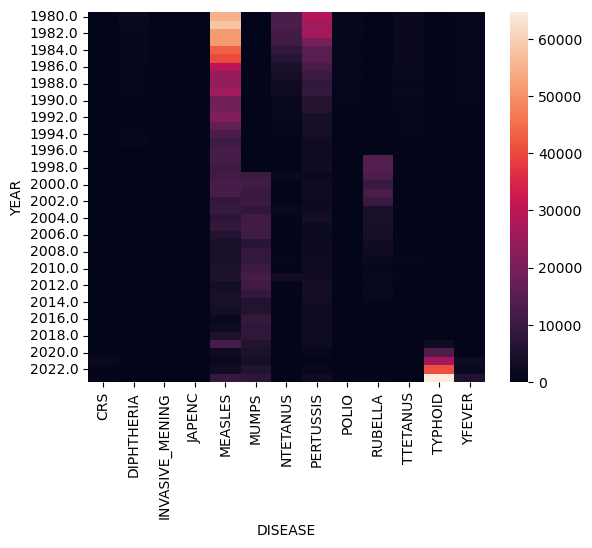

In [196]:

sns.heatmap(heat_map_data)


In [217]:
#7  A health agency wants to allocate vaccines to high-risk populations such as children under five and the elderly.
sch_under_risk=sch[sch['TARGETPOP'].isin(['RISKGROUPS','ADULTS','B_CHILD_W'])]

In [219]:
sch_under_risk.head()

,Unnamed: 0.1,Unnamed: 0,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
4,4,4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN
5,5,5,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,6.0,B_CHILD_W,General/routine,NATIONAL,Y10,NaN
6,6,6,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,1.0,RISKGROUPS,Risk group(s),NATIONAL,1st contact,"police, firemen, law-enforcement workers"
7,7,7,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,2.0,RISKGROUPS,Risk group(s),NATIONAL,+M1,"police, firemen, law-enforcement workers"
8,8,8,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,3.0,RISKGROUPS,Risk group(s),NATIONAL,+M5,"police, firemen, law-enforcement workers"


In [225]:
sch_under_risk_merge=pd.merge(sch_under_risk,cov,how='left')

In [237]:
sch_under_risk_merge.head()

,Unnamed: 0.1,Unnamed: 0,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,...,GROUP,CODE,NAME,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,4,4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,...,COUNTRIES,ABW,Aruba,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69
1,5,5,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,6.0,B_CHILD_W,...,COUNTRIES,ABW,Aruba,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",OFFICIAL,Official coverage,1468.0,1219.0,82.69
2,6,6,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,1.0,RISKGROUPS,...,COUNTRIES,ABW,Aruba,DIPHCV6,"Diphtheria-containing vaccine, 6th dose (3rd b...",ADMIN,Administrative coverage,1468.0,1219.0,83.04
3,7,7,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,2.0,RISKGROUPS,...,COUNTRIES,ABW,Aruba,DIPHCV6,"Diphtheria-containing vaccine, 6th dose (3rd b...",OFFICIAL,Official coverage,945.0,926.0,83.04
4,8,8,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,3.0,RISKGROUPS,...,COUNTRIES,ABW,Aruba,DTPCV1,"DTP-containing vaccine, 1st dose",ADMIN,Administrative coverage,945.0,926.0,97.99


In [215]:
sch_under_risk.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
ISO_3_CODE               0
COUNTRYNAME              0
WHO_REGION               0
YEAR                     0
VACCINECODE              0
VACCINE_DESCRIPTION      0
SCHEDULEROUNDS           0
TARGETPOP                0
TARGETPOP_DESCRIPTION    0
GEOAREA                  0
AGEADMINISTERED          0
SOURCECOMMENT            0
dtype: int64

In [213]:
sch_under_risk=sch_under_risk[~sch_under_risk['SOURCECOMMENT'].isnull()]

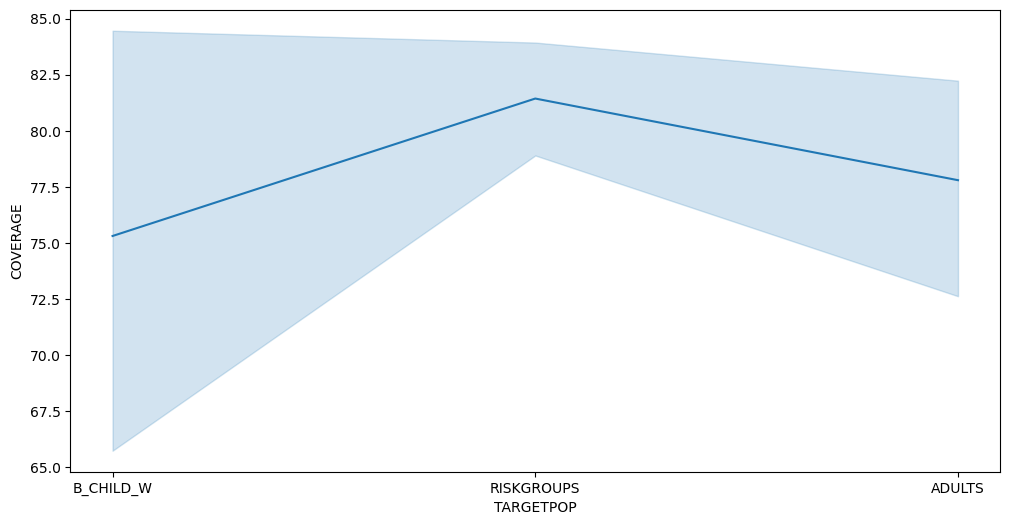

In [239]:
plt.figure(figsize=(12,6))
sns.lineplot(x='TARGETPOP',y='COVERAGE',data=sch_under_risk_merge)
plt.show()

In [265]:
#8  A non-profit wants to detect disparities in vaccination coverage across different socioeconomic groups within a country.
cov.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,1044.0,945.0,90.52
1,1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,1044.0,945.0,90.52
2,2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,1219.0,1008.0,90.52
4,4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


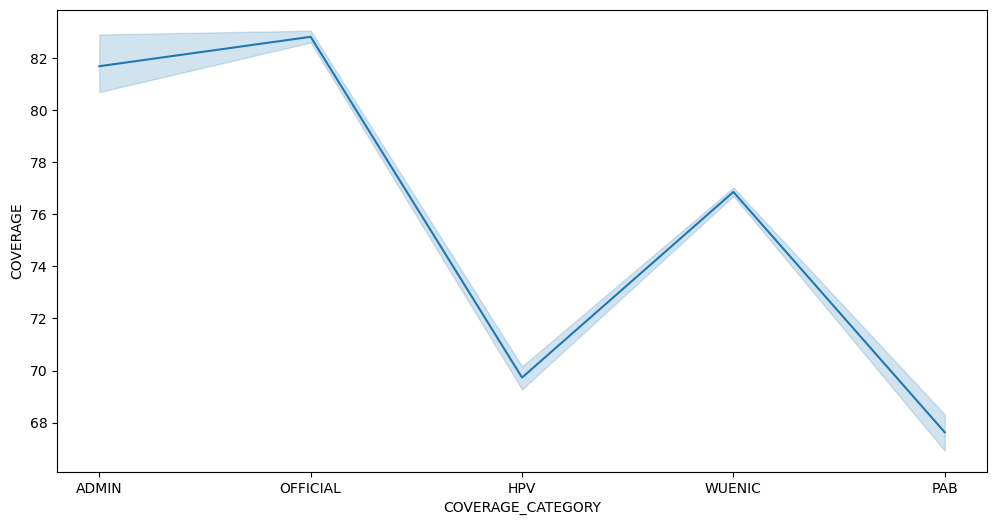

In [267]:
plt.figure(figsize=(12,6))
sns.lineplot(x='COVERAGE_CATEGORY',y='COVERAGE',data=cov)
plt.show()

In [271]:
#9 vaccination rate through out year
DOS=cov['DOSES']

In [273]:
DOS

0             945.0
1             945.0
2             945.0
3            1008.0
4            1008.0
            ...    
399854    1209026.0
399855     276306.0
399856    1296611.0
399857      40245.0
399858          NaN
Name: DOSES, Length: 399859, dtype: float64

In [279]:
DOS.value_counts()

DOSES
0.0           11604
107271.0       2485
1296.0         2285
5079.0         2228
10654.0        1780
              ...  
9643923.0         1
12845702.0        1
4573363.0         1
13036562.0        1
40245.0           1
Name: count, Length: 53792, dtype: int64

In [275]:
tar=cov['TARGET_NUMBER']

In [277]:
tar

0             1044.0
1             1044.0
2             1044.0
3             1219.0
4             1219.0
             ...    
399854    27939588.0
399855     4494513.0
399856    27939588.0
399857    27939588.0
399858           NaN
Name: TARGET_NUMBER, Length: 399859, dtype: float64

In [281]:
total_doses=cov['DOSES'].sum()

In [283]:
total_doses

459360728944.78033

In [285]:
total_target=cov['TARGET_NUMBER'].sum()

In [287]:
total_target

53379192861089.51

In [297]:
vaccination_rate=total_doses/total_target*100

In [301]:
#total vaccination rate
vaccination_rate*100

86.05613991582646

In [305]:

yearly_data = cov.groupby('YEAR')[['DOSES', 'TARGET_NUMBER']].sum()

In [307]:
yearly_data

,DOSES,TARGET_NUMBER
YEAR,,
1980.0,2.453552e+09,7.154832e+09
1981.0,2.960669e+09,7.625326e+09
1982.0,2.968804e+09,7.478730e+09
1983.0,3.663466e+09,7.660359e+09
1984.0,3.999186e+09,7.813239e+09
1985.0,4.415042e+09,8.942149e+09
1986.0,4.628670e+09,9.144480e+09
1987.0,4.911983e+09,9.166802e+09
1988.0,5.447811e+09,9.375434e+09


In [309]:
yearly_data['Vaccination Rate'] = (yearly_data['DOSES'] / yearly_data['TARGET_NUMBER']) * 100


In [313]:
yearly_data

,DOSES,TARGET_NUMBER,Vaccination Rate
YEAR,,,
1980.0,2.453552e+09,7.154832e+09,34.292240
1981.0,2.960669e+09,7.625326e+09,38.826784
1982.0,2.968804e+09,7.478730e+09,39.696637
1983.0,3.663466e+09,7.660359e+09,47.823681
1984.0,3.999186e+09,7.813239e+09,51.184737
1985.0,4.415042e+09,8.942149e+09,49.373392
1986.0,4.628670e+09,9.144480e+09,50.617093
1987.0,4.911983e+09,9.166802e+09,53.584477
1988.0,5.447811e+09,9.375434e+09,58.107299


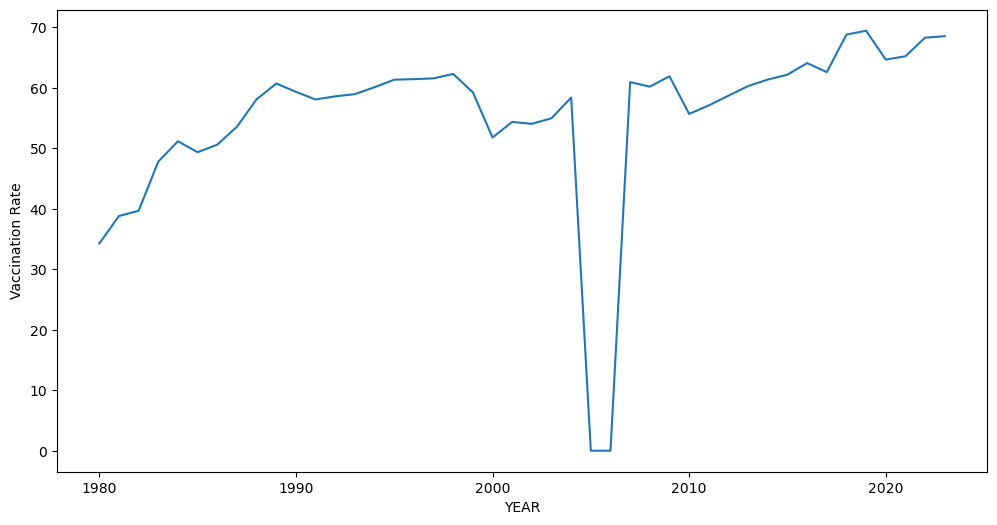

In [321]:
plt.figure(figsize=(12,6))
sns.lineplot(x="YEAR",y="Vaccination Rate",data=yearly_data)
plt.show()

In [323]:
sch['WHO_REGION'].value_counts()

WHO_REGION
EURO     2156
AMRO     2111
AFRO     1481
WPRO     1088
EMRO      861
SEARO     356
Name: count, dtype: int64

In [6]:
#10. Two regions use different vaccination strategies (e.g., door-to-door vs. centralized
# vaccination clinics). Authorities want to know which strategy is more effective.

# comparing two region strategy creating a new column strategy 
sch['STRATEGY']=sch['WHO_REGION'].map({
    'EURO':'Door-to-Door',
    'AMRO':'Centralized',
    'AFRO':'Mass_vaccination',
    'WPRO':'Vaccination via school',
    'EMRO':'Target Vaccination',
    'SEARO':'Virtual or Online Registration'
    })
    



In [8]:
sch.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION',
       'YEAR', 'VACCINECODE', 'VACCINE_DESCRIPTION', 'SCHEDULEROUNDS',
       'TARGETPOP', 'TARGETPOP_DESCRIPTION', 'GEOAREA', 'AGEADMINISTERED',
       'SOURCECOMMENT', 'STRATEGY'],
      dtype='object')

In [10]:
sch.head()

,Unnamed: 0.1,Unnamed: 0,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT,STRATEGY
0,0,0,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN,Centralized
1,1,1,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN,Centralized
2,2,2,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN,Centralized
3,3,3,ABW,Aruba,AMRO,2023.0,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN,Centralized
4,4,4,ABW,Aruba,AMRO,2023.0,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN,Centralized


In [12]:
merge_sch_cov=pd.merge(cov,sch,how='left')

In [14]:
strategy_comp=merge_sch_cov.groupby(['WHO_REGION','STRATEGY'])[['DOSES','TARGET_NUMBER']].sum()

In [16]:
strategy_comp.head()

,,DOSES,TARGET_NUMBER
WHO_REGION,STRATEGY,,
AFRO,Mass_vaccination,92295246.0,126716115.0
AMRO,Centralized,995137.0,1552517.0
EMRO,Target Vaccination,23497.0,270308.0
EURO,Door-to-Door,187233543.0,248287612.0
SEARO,Virtual or Online Registration,82188.0,221382.0


In [18]:
strategy_comp['VACCINATION_RATE']=(strategy_comp['DOSES']/strategy_comp['TARGET_NUMBER'])*100

In [20]:
strategy_comp

,,DOSES,TARGET_NUMBER,VACCINATION_RATE
WHO_REGION,STRATEGY,,,
AFRO,Mass_vaccination,92295246.0,126716115.0,72.836234
AMRO,Centralized,995137.0,1552517.0,64.098300
EMRO,Target Vaccination,23497.0,270308.0,8.692677
EURO,Door-to-Door,187233543.0,248287612.0,75.409942
SEARO,Virtual or Online Registration,82188.0,221382.0,37.124970
WPRO,Vaccination via school,322603.0,592648.0,54.434167


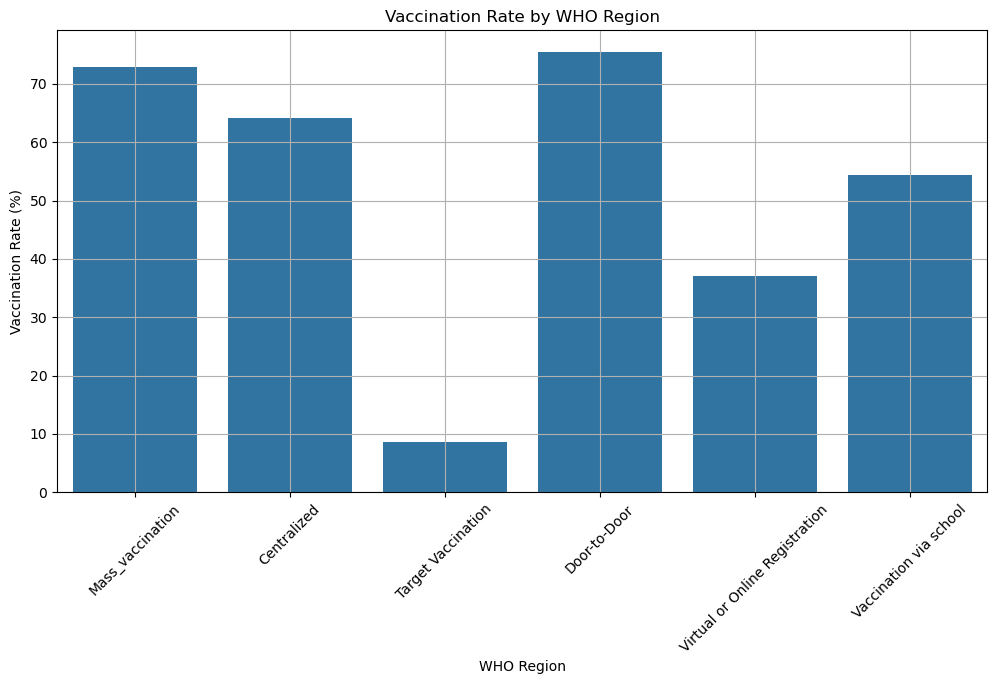

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x="STRATEGY", y="VACCINATION_RATE", data=strategy_comp)

# Customize the plot
plt.title('Vaccination Rate by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Vaccination Rate (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long
plt.grid(True)
plt.show()

### MEDIUM LEVEL


In [20]:
#1  Is there a correlation between vaccine introduction and a decrease in disease cases?
intro['DESCRIPTION'].value_counts()

DESCRIPTION
Seasonal Influenza vaccine                         14716
IPV (Inactivated polio vaccine)                    12255
Measles-containing vaccine 2nd dose                10943
YF (Yellow fever) vaccine                          10287
Mumps vaccine                                       9959
Rubella vaccine                                     9959
Hepatitis B vaccine                                 7827
Hib (Haemophilus influenzae type B) vaccine         7171
HepB birth dose                                     6674
Meningococcal meningitis vaccines (all strains)     4828
PPV (Pneumococcal polysaccharide vaccine)           4828
PCV (Pneumococcal conjugate vaccine)                4637
Japanese Encephalitis                               4446
Varicella vaccine                                   4446
aP (acellular pertussis) vaccine                    4446
IPV (Inactivated polio vaccine) 2nd dose            4445
Hepatitis A vaccine                                 4255
Typhoid            

In [22]:
intro['INTRO'].value_counts()

INTRO
No                97696
Yes               37844
Yes (R)            1708
Yes (P)             825
High risk area      118
Yes (A)              67
ND                   39
Yes (O)              22
Yes (D)               2
Name: count, dtype: int64

In [24]:
Yes_intro=intro[intro['INTRO'].isin(['Yes','Yes (R)','Yes (P)','Yes (A)','Yes (O)','Yes (D)'])]

In [26]:
rep['CASES']

0           0.0
1           0.0
2           1.0
3           1.0
4           0.0
          ...  
84864     134.0
84865    6290.0
84866      32.0
84867     139.0
84868     139.0
Name: CASES, Length: 84869, dtype: float64

In [32]:
cases_intro_merge=pd.merge(Yes_intro,rep,how='inner')

In [34]:
cases_intro_merge = cases_intro_merge.loc[:, ~cases_intro_merge.columns.str.contains('^Unnamed')]

In [55]:
cases_intro_merge.isnull().sum()

ISO_3_CODE             0
COUNTRYNAME            0
WHO_REGION             0
YEAR                   0
DESCRIPTION            0
INTRO                  0
GROUP                  0
CODE                   0
NAME                   0
DISEASE                0
DISEASE_DESCRIPTION    0
CASES                  0
dtype: int64

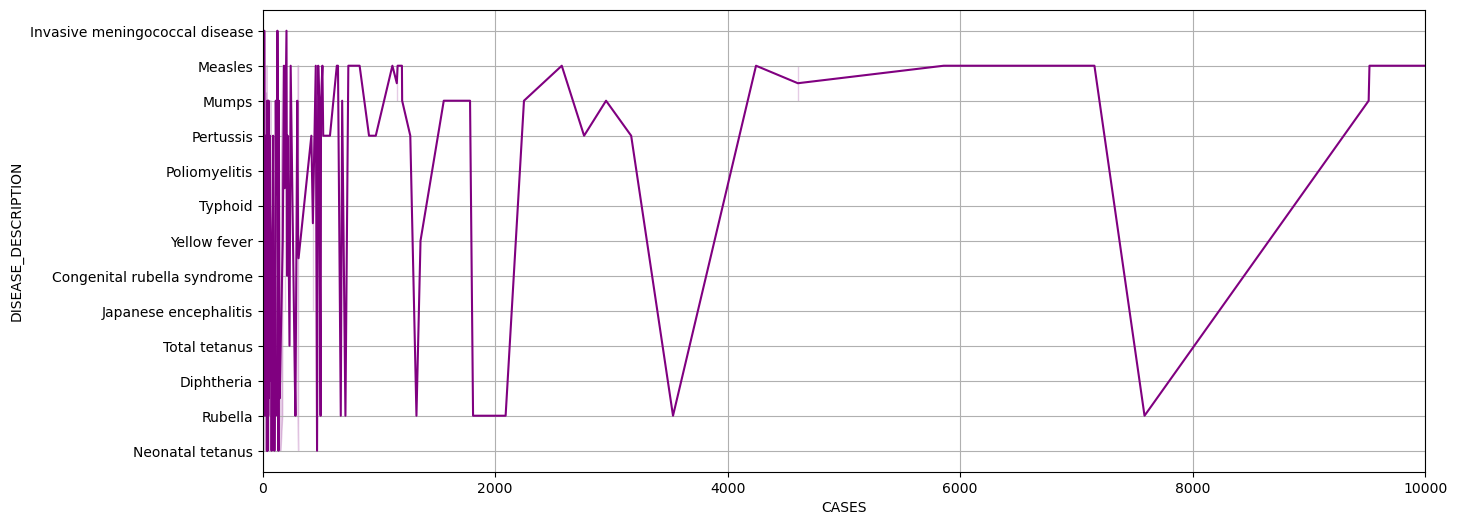

In [36]:
plt.figure(figsize=(15,6))
sns.lineplot(x='CASES',y='DISEASE_DESCRIPTION',data=cases_intro_merge,color='purple')
plt.xlim(0, 10000)
plt.grid(True)
plt.show()

In [48]:

# 2. What is the trend in disease cases before and after vaccination campaigns?
# let's suppose the campaign introduce after 2006 and before it no campaign was their
Yes_intro

,Unnamed: 0,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
2,2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes
6,6,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine),Yes
7,7,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine) 2nd dose,Yes
...,...,...,...,...,...,...,...
138048,138048,ZWE,Zimbabwe,AFRO,1998.0,Hepatitis B vaccine,Yes
138057,138057,ZWE,Zimbabwe,AFRO,1997.0,Hepatitis B vaccine,Yes
138066,138066,ZWE,Zimbabwe,AFRO,1996.0,Hepatitis B vaccine,Yes
138075,138075,ZWE,Zimbabwe,AFRO,1995.0,Hepatitis B vaccine,Yes


In [76]:
yes_cases=pd.merge(Yes_intro,rep,how='outer')

In [78]:
yes_cases = yes_cases.loc[:, ~yes_cases.columns.str.contains('^Unnamed')]

In [80]:
yes_cases.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO,GROUP,CODE,NAME,DISEASE,DISEASE_DESCRIPTION,CASES
0,NaN,NaN,NaN,2023.0,NaN,NaN,COUNTRIES,ABW,Aruba,CRS,Congenital rubella syndrome,0.0
1,NaN,NaN,NaN,2023.0,NaN,NaN,COUNTRIES,ABW,Aruba,DIPHTHERIA,Diphtheria,0.0
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes,COUNTRIES,ABW,Aruba,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes,COUNTRIES,ABW,Aruba,MEASLES,Measles,1.0
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes,COUNTRIES,ABW,Aruba,MUMPS,Mumps,0.0


In [88]:
yes_cases = yes_cases.ffill()

In [90]:
yes_cases.isnull().sum()

ISO_3_CODE             0
COUNTRYNAME            0
WHO_REGION             0
YEAR                   0
DESCRIPTION            0
INTRO                  0
GROUP                  0
CODE                   0
NAME                   0
DISEASE                0
DISEASE_DESCRIPTION    0
CASES                  0
dtype: int64

In [92]:
yes_cases.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO,GROUP,CODE,NAME,DISEASE,DISEASE_DESCRIPTION,CASES
0,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes,COUNTRIES,ABW,Aruba,CRS,Congenital rubella syndrome,0.0
1,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes,COUNTRIES,ABW,Aruba,DIPHTHERIA,Diphtheria,0.0
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes,COUNTRIES,ABW,Aruba,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes,COUNTRIES,ABW,Aruba,MEASLES,Measles,1.0
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes,COUNTRIES,ABW,Aruba,MUMPS,Mumps,0.0


In [134]:
# Step 1: Extract the year when the vaccine was introduced (assuming 'INTRO' column is "Yes")
  # Get the first year where vaccine was introduced

# Assuming 'INTRO' column is "Yes" to indicate vaccine introduction, we first find the year
vaccine_introduction_year = yes_cases[yes_cases['INTRO'] == 'Yes']['YEAR'].min()  # Get the earliest year the vaccine was introduced

#Split the data into pre-vaccine and post-vaccine
pre_vaccine_data = yes_cases[(yes_cases['YEAR'] >= 1980) & (yes_cases['YEAR'] <= 2006)]
post_vaccine_data = yes_cases[(yes_cases['YEAR'] > 2006) & (yes_cases['YEAR'] <= 2023)]


In [136]:
rep.head()

,Unnamed: 0.1,Unnamed: 0,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,CASES
0,0,0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,0.0
1,1,1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,0.0
2,2,2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,3,3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,1.0
4,4,4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,0.0


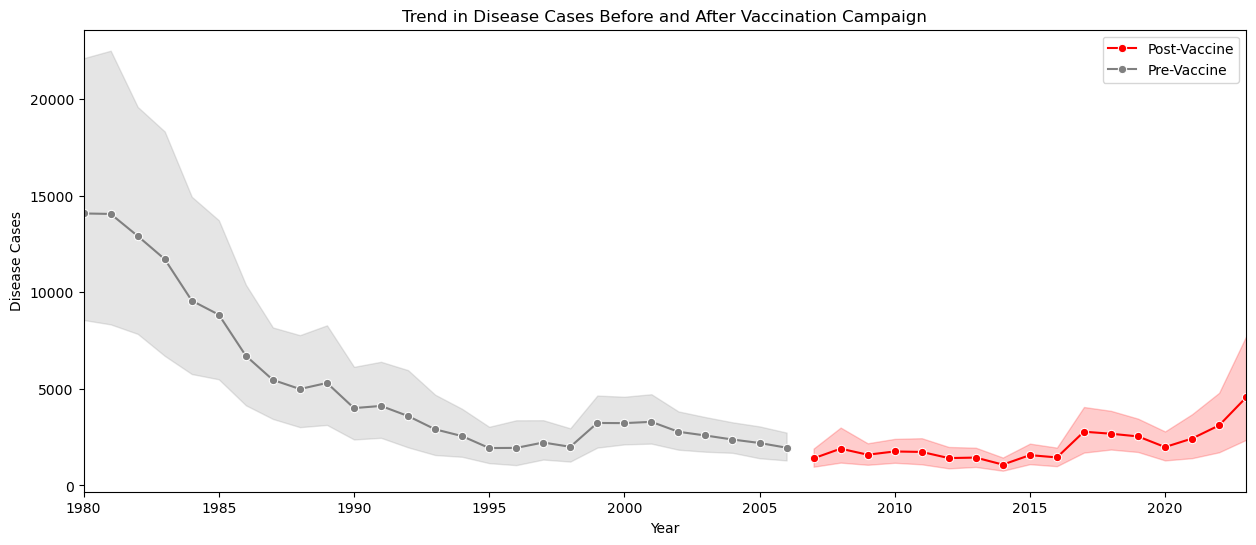

In [138]:
plt.figure(figsize=(15, 6))



# Plot disease cases after vaccine introduction with markers
sns.lineplot(x='YEAR', y='CASES', data=post_vaccine_data, label='Post-Vaccine', color='red', marker='o')
sns.lineplot(x='YEAR', y='CASES', data=pre_vaccine_data, label='Pre-Vaccine', color='grey', marker='o')

# Add title, labels, and legend
plt.title('Trend in Disease Cases Before and After Vaccination Campaign')
plt.xlabel('Year')
plt.ylabel('Disease Cases')
plt.legend()
plt.xlim(1980,2023)
# Display the plot
plt.show()

In [140]:
#3 Which diseases have shown the most significant reduction in cases due to vaccination?
# rep  dises case
Yes_intro.value_counts()

Unnamed: 0  ISO_3_CODE  COUNTRYNAME  WHO_REGION  YEAR    DESCRIPTION                          INTRO
2           AFG         Afghanistan  EMRO        2023.0  Hepatitis B vaccine                  Yes      1
90270       NGA         Nigeria      AFRO        2014.0  Hepatitis B vaccine                  Yes      1
90247       NGA         Nigeria      AFRO        2016.0  YF (Yellow fever) vaccine            Yes      1
90250       NGA         Nigeria      AFRO        2015.0  Hepatitis B vaccine                  Yes      1
90251       NGA         Nigeria      AFRO        2015.0  HepB birth dose                      Yes      1
                                                                                                      ..
42833       FRA         France       EURO        2001.0  Measles-containing vaccine 2nd dose  Yes      1
42835       FRA         France       EURO        2001.0  Mumps vaccine                        Yes      1
42838       FRA         France       EURO        2001.0  Rub

In [142]:
red_case=pd.merge(Yes_intro,rep,how='left')

In [144]:
red_case = red_case.loc[:, ~red_case.columns.str.contains('^Unnamed')]

In [146]:
red_case=red_case.ffill()

In [148]:
red_case.isnull().sum()

ISO_3_CODE             0
COUNTRYNAME            0
WHO_REGION             0
YEAR                   0
DESCRIPTION            0
INTRO                  0
GROUP                  0
CODE                   0
NAME                   0
DISEASE                0
DISEASE_DESCRIPTION    0
CASES                  0
dtype: int64

In [150]:
red_case.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO,GROUP,CODE,NAME,DISEASE,DISEASE_DESCRIPTION,CASES
0,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes,COUNTRIES,ABW,Aruba,INVASIVE_MENING,Invasive meningococcal disease,1.0
1,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes,COUNTRIES,ABW,Aruba,MEASLES,Measles,1.0
2,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes,COUNTRIES,ABW,Aruba,MUMPS,Mumps,0.0
3,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine),Yes,COUNTRIES,ABW,Aruba,PERTUSSIS,Pertussis,1.0
4,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine) 2nd dose,Yes,COUNTRIES,ABW,Aruba,POLIO,Poliomyelitis,0.0


In [162]:
combine_red_case=red_case.groupby('DESCRIPTION')[['DISEASE','CASES']].agg(list).reset_index()
#yearly_data = cov.groupby('YEAR')[['DOSES', 'TARGET_NUMBER']].sum()


In [164]:
combine_red_case

,DESCRIPTION,DISEASE,CASES
0,HPV (Human Papilloma Virus) vaccine,"[YFEVER, YFEVER, TTETANUS, TTETANUS, TTETANUS,...","[0.0, 0.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0,..."
1,HepB birth dose,"[MEASLES, YFEVER, YFEVER, YFEVER, YFEVER, YFEV...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1154...."
2,Hepatitis A vaccine,"[YFEVER, YFEVER, YFEVER, YFEVER, YFEVER, YFEVE...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Hepatitis B vaccine,"[INVASIVE_MENING, YFEVER, YFEVER, YFEVER, YFEV...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Hib (Haemophilus influenzae type B) vaccine,"[MUMPS, YFEVER, YFEVER, YFEVER, YFEVER, YFEVER...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1154...."
5,IPV (Inactivated polio vaccine),"[PERTUSSIS, YFEVER, YFEVER, YFEVER, YFEVER, YF...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 432.0..."
6,IPV (Inactivated polio vaccine) 2nd dose,"[POLIO, YFEVER, YFEVER, YFEVER, TTETANUS, TTET...","[0.0, 0.0, 0.0, 0.0, 74.0, 74.0, 0.0, 0.0, 0.0..."
7,Japanese Encephalitis,"[RUBELLA, RUBELLA, RUBELLA, RUBELLA, RUBELLA, ...","[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499..."
8,Malaria vaccine,"[YFEVER, YFEVER, YFEVER, YFEVER, YFEVER, MUMPS...","[0.0, 0.0, 0.0, 0.0, 0.0, 298.0, 298.0, 298.0,..."
9,Measles-containing vaccine 2nd dose,"[TYPHOID, YFEVER, YFEVER, YFEVER, YFEVER, YFEV...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 53.0, 74.0..."


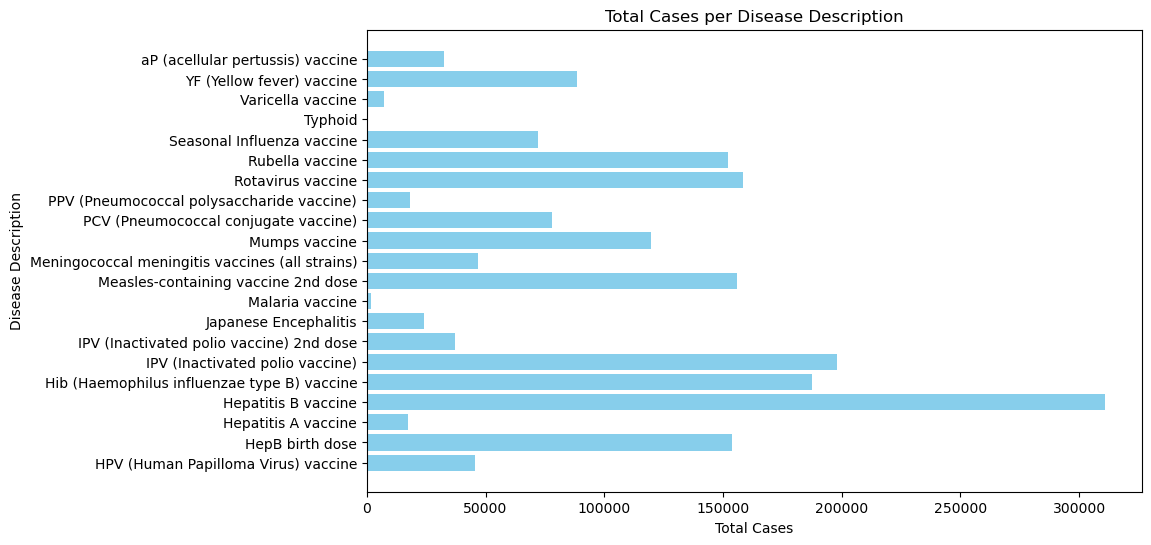

In [170]:


# Calculate total cases per DESCRIPTION by summing the 'CASES' list
combine_red_case['total_cases'] = combine_red_case['CASES'].apply(lambda x: sum(x))

#  cases per DESCRIPTION
plt.figure(figsize=(10, 6))
plt.barh(combine_red_case['DESCRIPTION'], combine_red_case['total_cases'], color='skyblue')
plt.xlabel('Total Cases')
plt.ylabel('Disease Description')
plt.title('Total Cases per Disease Description')
plt.show()


In [186]:
# 4. What percentage of the target population has been covered by each vaccine?

# Assume DataFrame contains 'DOSES', 'TARGET_NUMBER', and 'DESCRIPTION' or 'VACCINE'

# Group by DESCRIPTION or VACCINE (if you have a column for vaccines)
coverage = cov.groupby('ANTIGEN')[['DOSES', 'TARGET_NUMBER']].sum()

# Calculate the coverage percentage
coverage['coverage_percentage'] = (coverage['DOSES'] / coverage['TARGET_NUMBER']) * 100

print(coverage[['DOSES', 'TARGET_NUMBER', 'coverage_percentage']])


                     DOSES  TARGET_NUMBER  coverage_percentage
ANTIGEN                                                       
15HPV1_F      2.336805e+09   7.794630e+09            29.979678
15HPV1_M      1.878593e+09   8.201434e+09            22.905668
15HPVC_F      2.198946e+09   7.799404e+09            28.193766
15HPVC_M      1.915442e+09   8.277526e+09            23.140274
BCG           4.380897e+10   5.559473e+10            78.800582
...                    ...            ...                  ...
TTCV6         1.833493e+09   2.428409e+09            75.501824
TYPHOID       9.161126e+08   1.241512e+09            73.790042
TYPHOID_CONJ  9.822399e+08   1.228870e+09            79.930328
VAD1          8.265609e+09   1.171021e+13             0.070585
YFV           1.024398e+10   1.562462e+10            65.563106

[69 rows x 3 columns]


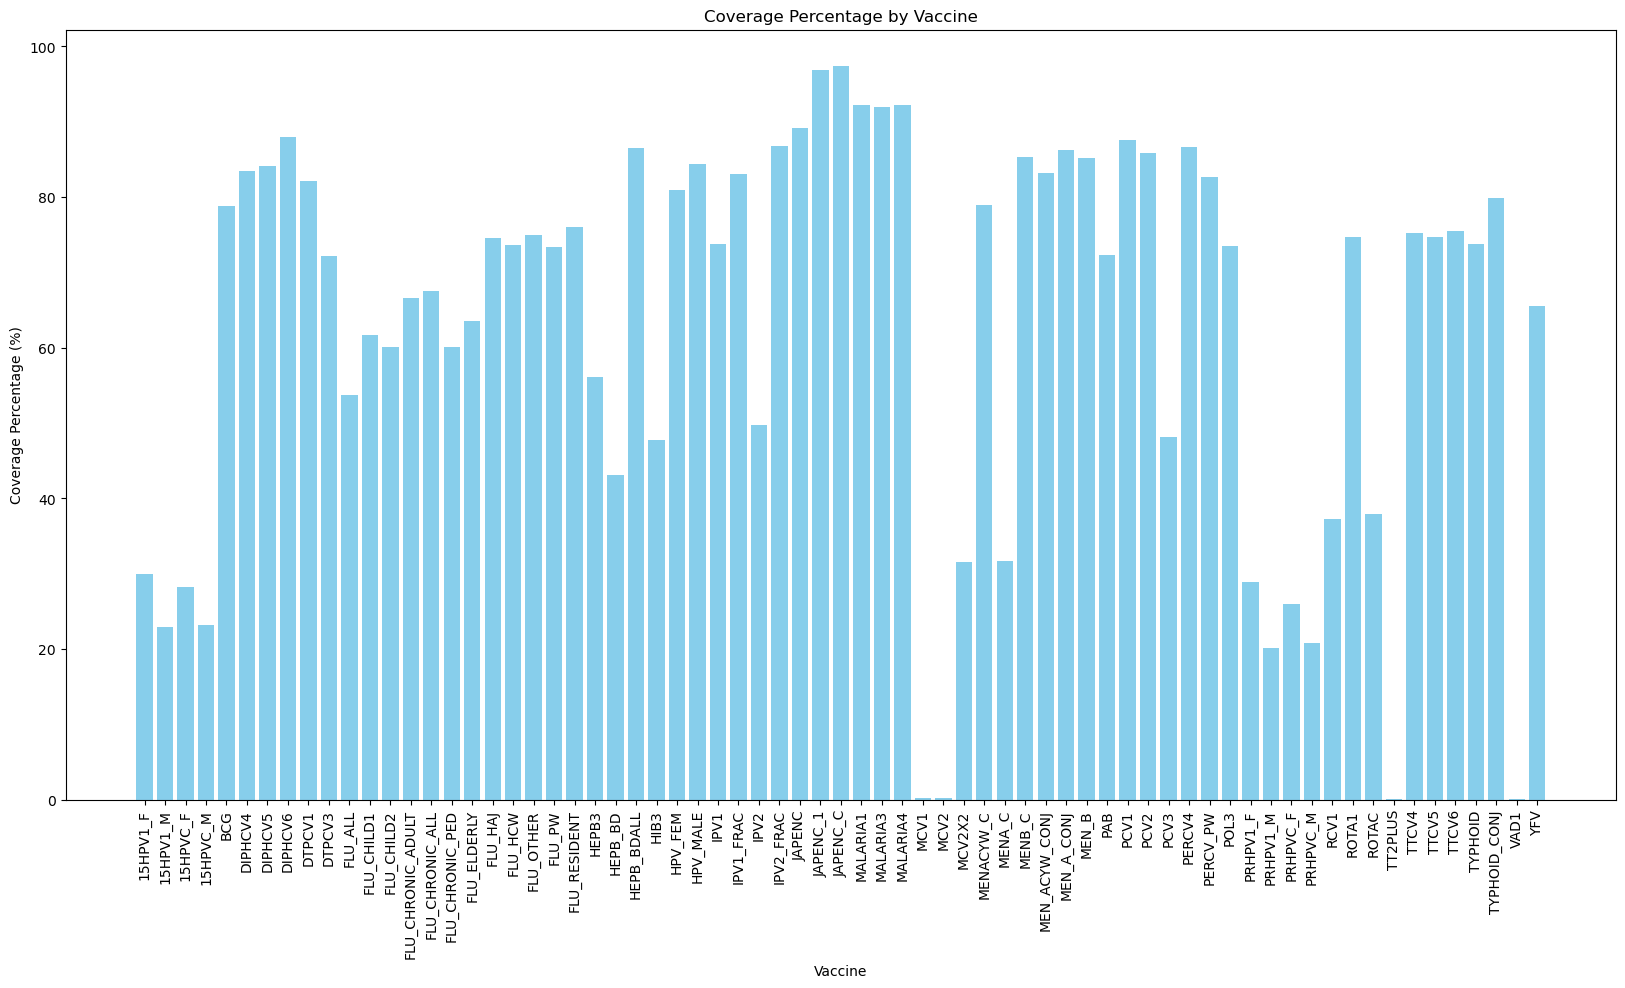

In [184]:
plt.figure(figsize=(20, 10))
plt.bar(coverage.index, coverage['coverage_percentage'], color='skyblue')

# Adding labels and title
plt.xlabel('Vaccine')
plt.ylabel('Coverage Percentage (%)')
plt.title('Coverage Percentage by Vaccine')
plt.xticks(rotation=90)
plt.show()

In [224]:
#5. How does the vaccination schedule (e.g., booster doses) impact target population coverage?
sch_cov=pd.merge(sch,cov,how='left')

In [212]:
sch_cov=sch_cov.ffill()

In [214]:
sch_cov.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
ISO_3_CODE                       0
COUNTRYNAME                      0
WHO_REGION                       0
YEAR                             0
VACCINECODE                      0
VACCINE_DESCRIPTION              0
SCHEDULEROUNDS                   0
TARGETPOP                        3
TARGETPOP_DESCRIPTION            0
GEOAREA                          0
AGEADMINISTERED                  0
SOURCECOMMENT                    6
GROUP                            0
CODE                             0
NAME                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64

In [216]:
sch_cov = sch_cov.loc[:, ~sch_cov.columns.str.contains('^Unnamed')]

In [218]:
sch_cov.isnull().sum()

ISO_3_CODE                       0
COUNTRYNAME                      0
WHO_REGION                       0
YEAR                             0
VACCINECODE                      0
VACCINE_DESCRIPTION              0
SCHEDULEROUNDS                   0
TARGETPOP                        3
TARGETPOP_DESCRIPTION            0
GEOAREA                          0
AGEADMINISTERED                  0
SOURCECOMMENT                    6
GROUP                            0
CODE                             0
NAME                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64

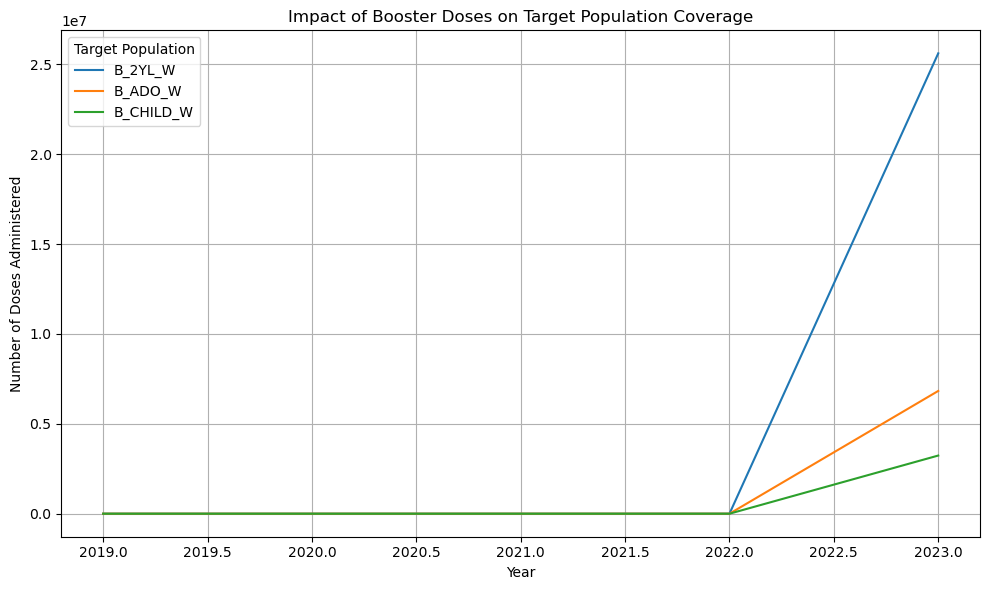

In [238]:

booster_dose = sch_cov[sch_cov['TARGETPOP'].isin(['B_2YL_W', 'B_CHILD_W', 'B_ADO_W'])]
booster_dose['YEAR'] = pd.to_numeric(booster_dose['YEAR'], errors='coerce')
booster_cov = booster_dose.groupby(['TARGETPOP', 'YEAR'])['DOSES'].sum().reset_index()
booster_dose['DOSES'] = booster_dose['DOSES'] * 1000

plt.figure(figsize=(10, 6))
for targetpop in booster_cov['TARGETPOP'].unique():
    data = booster_cov[booster_cov['TARGETPOP'] == targetpop]
    plt.plot(data['YEAR'], data['DOSES'], label=targetpop)

plt.xlabel('Year')
plt.ylabel('Number of Doses Administered')
plt.title('Impact of Booster Doses on Target Population Coverage')

# Adding a legend 
plt.legend(title='Target Population')
plt.grid(True)

plt.tight_layout()
plt.show()

In [226]:
print(booster_dose[['TARGETPOP', 'YEAR', 'DOSES']].head())


    TARGETPOP    YEAR   DOSES
3     B_2YL_W  2023.0  1008.0
4   B_CHILD_W  2023.0  1008.0
5   B_CHILD_W  2023.0  1219.0
89    B_2YL_W  2023.0   892.0
90  B_CHILD_W  2023.0   892.0


In [252]:
# 6. Are there significant disparities in vaccine introduction timelines across WHO regions?
Yes_intro.columns

Index(['ISO_3_CODE', 'COUNTRYNAME', 'WHO_REGION', 'YEAR', 'DESCRIPTION',
       'INTRO'],
      dtype='object')

In [250]:
Yes_intro = Yes_intro.loc[:, ~Yes_intro.columns.str.contains('^Unnamed')]

In [262]:
Yes_intro.head()

,ISO_3_CODE,COUNTRYNAME,WHO_REGION,YEAR,DESCRIPTION,INTRO
2,AFG,Afghanistan,EMRO,2023.0,Hepatitis B vaccine,Yes
3,AFG,Afghanistan,EMRO,2023.0,HepB birth dose,Yes
4,AFG,Afghanistan,EMRO,2023.0,Hib (Haemophilus influenzae type B) vaccine,Yes
6,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine),Yes
7,AFG,Afghanistan,EMRO,2023.0,IPV (Inactivated polio vaccine) 2nd dose,Yes


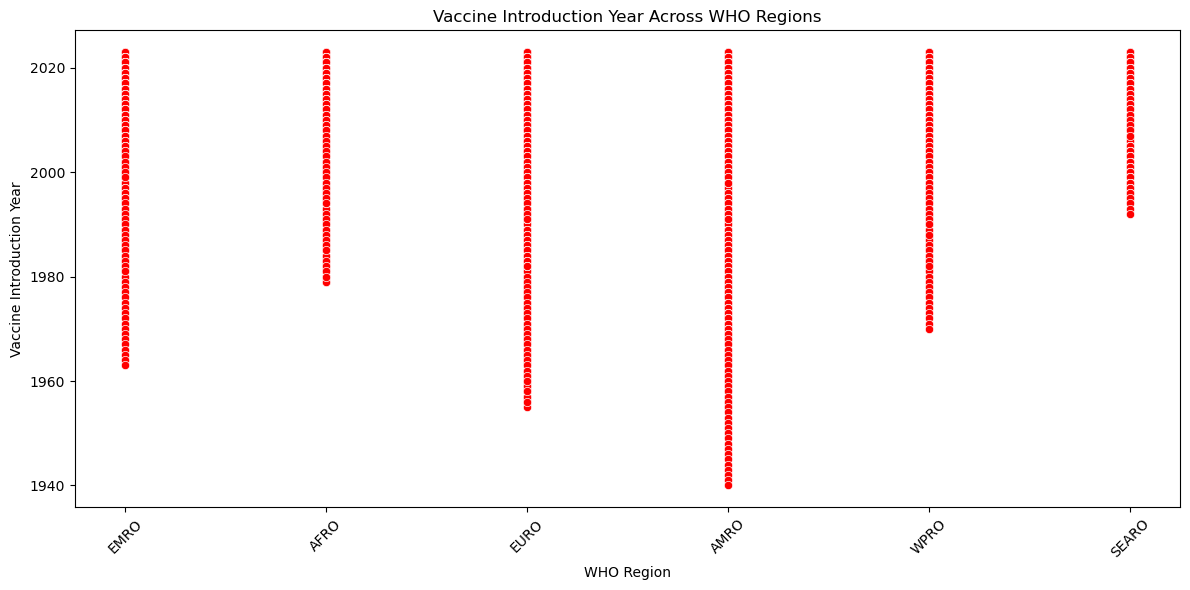

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show individual vaccine introduction years across WHO regions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='WHO_REGION', y='YEAR', data=introduced_vaccine_data, color='red')

# Add labels and title
plt.xlabel('WHO Region')
plt.ylabel('Vaccine Introduction Year')
plt.title('Vaccine Introduction Year Across WHO Regions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Ensure a tight layout
plt.tight_layout()
plt.show()


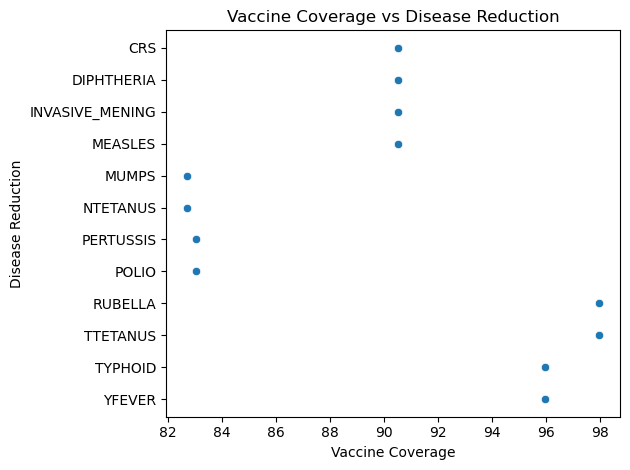

In [362]:
#7. How does vaccine coverage correlate with disease reduction for specific antigens?

sns.scatterplot(x='COVERAGE', y='DISEASE', data=Merge_Data, palette='viridis')
plt.title('Vaccine Coverage vs Disease Reduction')
plt.xlabel('Vaccine Coverage')
plt.ylabel('Disease Reduction')
plt.tight_layout()
plt.show()


In [324]:
Merge_Data.head()

,Unnamed: 0,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,1044.0,945.0,90.52,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,1044.0,945.0,90.52,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,1219.0,1008.0,90.52,MEASLES,Measles,"per 1,000,000 total population",9.3
4,4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69,MUMPS,Mumps,"per 1,000,000 total population",0.0


In [322]:
Merge_Data=pd.merge(cov,inc, how='inner')

In [27]:
#8. Are there specific regions or countries with low coverage despite high availability of vaccines?

Merge_Data_sch_cov=pd.merge(cov,sch, how='inner')

In [29]:
Merge_Data_sch_cov = Merge_Data_sch_cov.loc[:, ~Merge_Data_sch_cov.columns.str.contains('^Unnamed')]

In [31]:
Merge_Data_sch_cov.head()

,GROUP,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,...,COUNTRYNAME,WHO_REGION,VACCINECODE,VACCINE_DESCRIPTION,SCHEDULEROUNDS,TARGETPOP,TARGETPOP_DESCRIPTION,GEOAREA,AGEADMINISTERED,SOURCECOMMENT
0,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,ADMIN,Administrative coverage,1044.0,945.0,...,Aruba,AMRO,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,1.0,NaN,General/routine,NATIONAL,M2,NaN
1,COUNTRIES,ABW,Aruba,2023.0,BCG,BCG,OFFICIAL,Official coverage,1044.0,945.0,...,Aruba,AMRO,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,2.0,NaN,General/routine,NATIONAL,M4,NaN
2,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,...,Aruba,AMRO,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,3.0,NaN,General/routine,NATIONAL,M6,NaN
3,COUNTRIES,ABW,Aruba,2023.0,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,1219.0,1008.0,...,Aruba,AMRO,DTAPHIBIPV,DTaP-Hib-IPV (acellular) vaccine,4.0,B_2YL_W,General/routine,NATIONAL,M15,NaN
4,COUNTRIES,ABW,Aruba,2023.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,...,Aruba,AMRO,DTAPIPV,DTaP-IPV (acellular) vaccine,5.0,B_CHILD_W,General/routine,NATIONAL,Y4,NaN


In [382]:
Merge_Data_sch_cov=Merge_Data_sch_cov.bfill()

In [384]:
Merge_Data_sch_cov.isnull().sum()

GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
ISO_3_CODE                       0
COUNTRYNAME                      0
WHO_REGION                       0
VACCINECODE                      0
VACCINE_DESCRIPTION              0
SCHEDULEROUNDS                   0
TARGETPOP                        0
TARGETPOP_DESCRIPTION            0
GEOAREA                          0
AGEADMINISTERED                  0
SOURCECOMMENT                    0
dtype: int64

In [410]:
Merge_Data_sch_cov['DOSES'] 

0       945
1       945
2       945
3      1008
4      1008
       ... 
606     131
607     131
608     131
609     131
610     131
Name: DOSES, Length: 611, dtype: int32

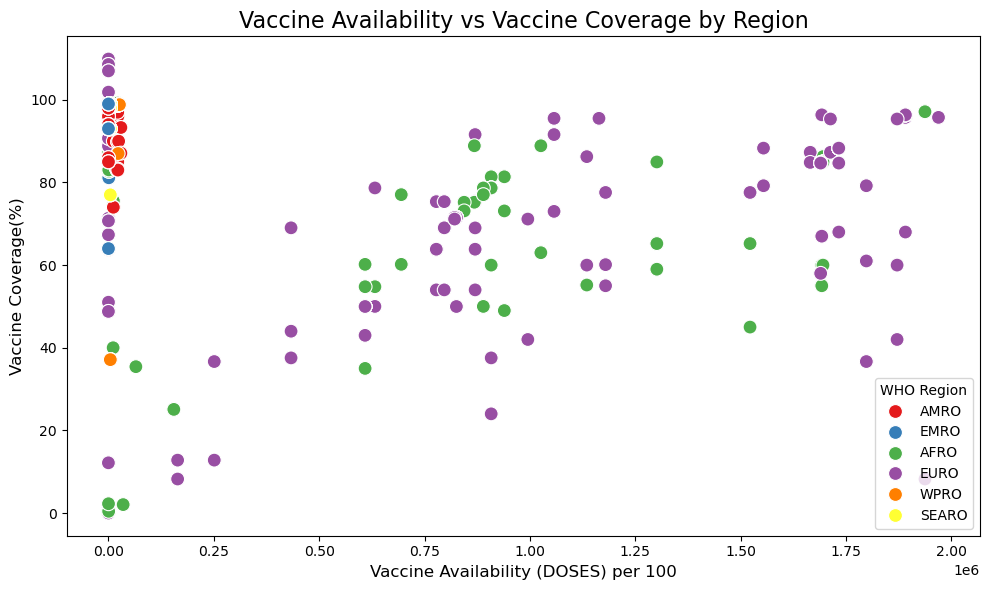

In [438]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DOSES', y='COVERAGE', data=Merge_Data_sch_cov, hue='WHO_REGION', palette='Set1', s=100)

# Adding labels and title
plt.title('Vaccine Availability vs Vaccine Coverage by Region', fontsize=16)
plt.xlabel('Vaccine Availability (DOSES) per 100', fontsize=12)
plt.ylabel('Vaccine Coverage(%)', fontsize=12)
plt.legend(title='WHO Region')
plt.tight_layout()


In [460]:
filtered_data=cov[cov['ANTIGEN'].isin(['prHPV1_F', 'prHPVc_F', '15HPV1_F', '15HPV1_F', '15HPVc_F', 
                          'prHPV1_M', 'prHPVc_M', 'prHPV1_M', 'prHPVc_M'])]


In [462]:
filtered_data.value_counts()

Unnamed: 0  GROUP        CODE  NAME                    YEAR    ANTIGEN   ANTIGEN_DESCRIPTION                                      COVERAGE_CATEGORY  COVERAGE_CATEGORY_DESCRIPTION  TARGET_NUMBER  DOSES      COVERAGE
468         COUNTRIES    AFG   Afghanistan             2023.0  15HPV1_F  HPV Vaccination coverage by age 15, first dose, females  HPV                HPV Estimates                  2057002.0      1969540.0  95.75       1
292695      COUNTRIES    SAU   Saudi Arabia            2021.0  15HPV1_F  HPV Vaccination coverage by age 15, first dose, females  HPV                HPV Estimates                  485386.0       456748.0   94.10       1
292903      COUNTRIES    SAU   Saudi Arabia            2019.0  15HPV1_F  HPV Vaccination coverage by age 15, first dose, females  HPV                HPV Estimates                  456931.0       239659.0   52.40       1
293004      COUNTRIES    SAU   Saudi Arabia            2018.0  15HPV1_F  HPV Vaccination coverage by age 15, first dose, fema

In [456]:
ant_val_merge=pd.merge(ant_val,cov,how='left')

In [458]:
ant_val_merge.isnull().sum()

Unnamed: 0                       0
GROUP                            0
CODE                             0
NAME                             0
YEAR                             0
ANTIGEN                          0
ANTIGEN_DESCRIPTION              0
COVERAGE_CATEGORY                0
COVERAGE_CATEGORY_DESCRIPTION    0
TARGET_NUMBER                    0
DOSES                            0
COVERAGE                         0
dtype: int64

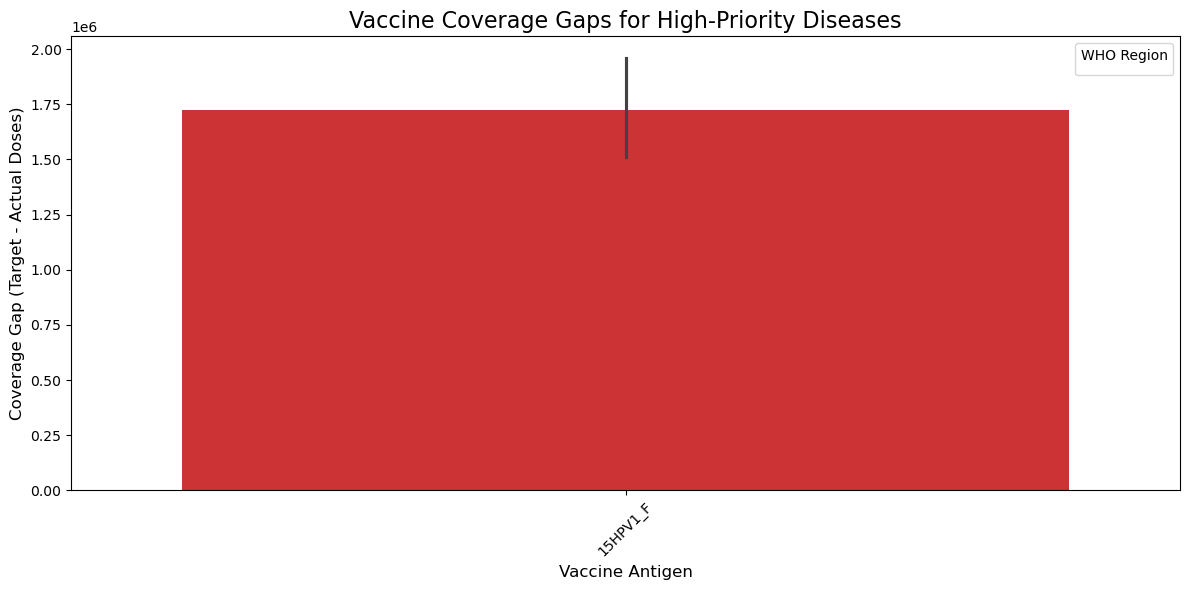

In [466]:
# 9. What are the gaps in coverage for vaccines targeting high-priority diseases (e.g., TB, Hepatitis B)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the data for high-priority diseases like TB and Hepatitis B
# You can use specific antigen names to filter for these diseases. For instance:
high_priority_diseases = ['TB', 'Hepatitis B']

# Filtering the rows for these diseases (assuming 'ANTIGEN' column contains disease names)
filtered_data = cov[cov['ANTIGEN'].isin(['prHPV1_F', 'prHPVc_F', '15HPV1_F', '15HPV1_F', 
                                         '15HPVc_F', 'prHPV1_M', 'prHPVc_M', 'prHPV1_M', 'prHPVc_M'])]

# Step 2: Calculate the vaccine coverage for the selected diseases
filtered_data['Vaccine_Coverage'] = filtered_data['DOSES'] / filtered_data['TARGET_NUMBER']

# Step 3: Calculate the gaps in coverage
# Gap = Target Number - Actual Doses (this will show how much is missing)
filtered_data['Coverage_Gap'] = filtered_data['TARGET_NUMBER'] - filtered_data['DOSES']

plt.figure(figsize=(12, 6))

# Bar plot to show the gaps in coverage for each disease
sns.barplot(x='ANTIGEN', y='Coverage_Gap', data=filtered_data, palette='Set1')

# Adding labels and title
plt.title('Vaccine Coverage Gaps for High-Priority Diseases', fontsize=16)
plt.xlabel('Vaccine Antigen', fontsize=12)
plt.ylabel('Coverage Gap (Target - Actual Doses)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='WHO Region')

# Show the plot
plt.tight_layout()
plt.show()


In [43]:
#  10. Are certain diseases more prevalent in specific geographic areas?
Merge_Datas=pd.merge(Merge_Data_sch_cov,rep,how='inner')

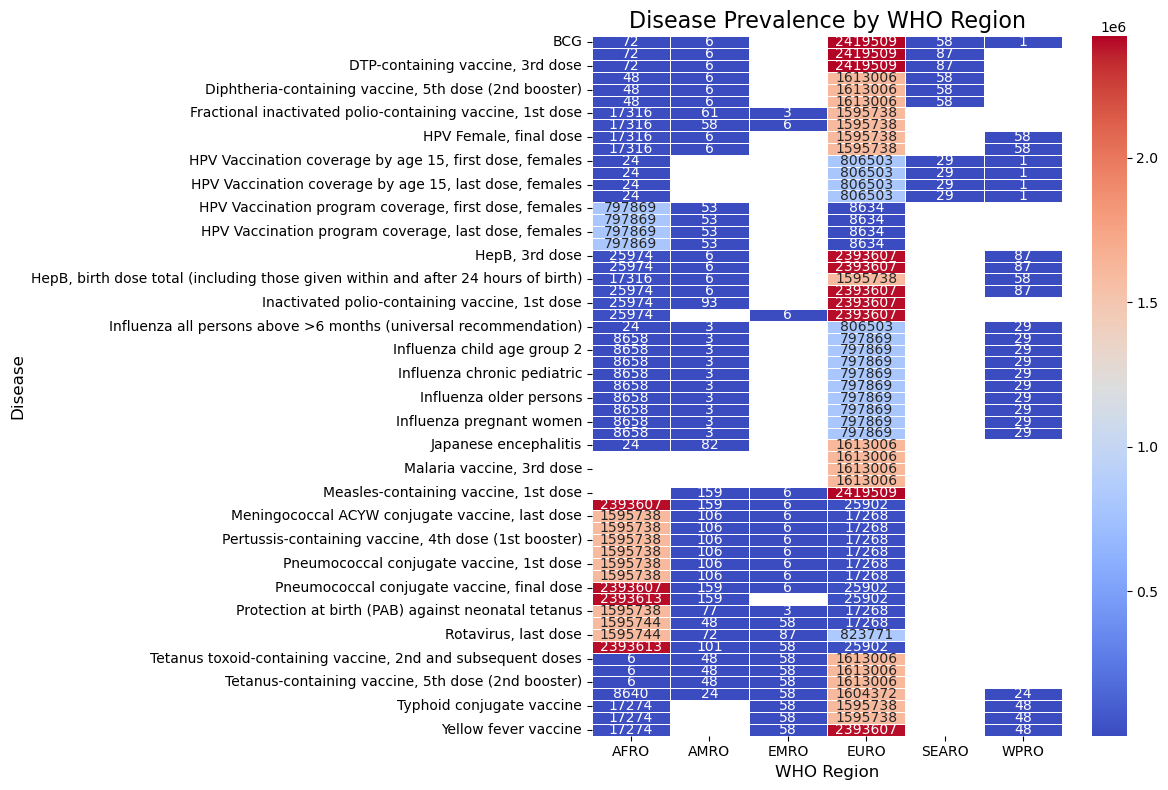

In [41]:
disease_prevalence = Merge_Datas.groupby(['WHO_REGION', 'ANTIGEN_DESCRIPTION']).agg({
    'CASES': 'sum'  # Summing the total number of cases for each disease in each region
}).reset_index()

# Step 2: Pivot the data to make the WHO_REGION as columns and diseases as rows
disease_prevalence_pivot = disease_prevalence.pivot(index='ANTIGEN_DESCRIPTION', columns='WHO_REGION', values='CASES')

# Step 3: Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(disease_prevalence_pivot, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)

# Step 4: Add titles and labels
plt.title('Disease Prevalence by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Disease', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### EASY LEVEL

In [50]:
# 1. How do vaccination rates correlate with a decrease in disease incidence?
# merging incidence column and coverage
inc_cov=pd.merge(inc,cov,how='inner')

In [54]:
inc_cov = inc_cov.loc[:, ~inc_cov.columns.str.contains('^Unnamed')] # remove unnamed column

In [56]:
inc_cov.head()

,GROUP,CODE,NAME,YEAR,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,COUNTRIES,ABW,Aruba,2023.0,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0,BCG,BCG,ADMIN,Administrative coverage,1044.0,945.0,90.52
1,COUNTRIES,ABW,Aruba,2023.0,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0,BCG,BCG,OFFICIAL,Official coverage,1044.0,945.0,90.52
2,COUNTRIES,ABW,Aruba,2023.0,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.52
3,COUNTRIES,ABW,Aruba,2023.0,MEASLES,Measles,"per 1,000,000 total population",9.3,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,1219.0,1008.0,90.52
4,COUNTRIES,ABW,Aruba,2023.0,MUMPS,Mumps,"per 1,000,000 total population",0.0,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219.0,1008.0,82.69


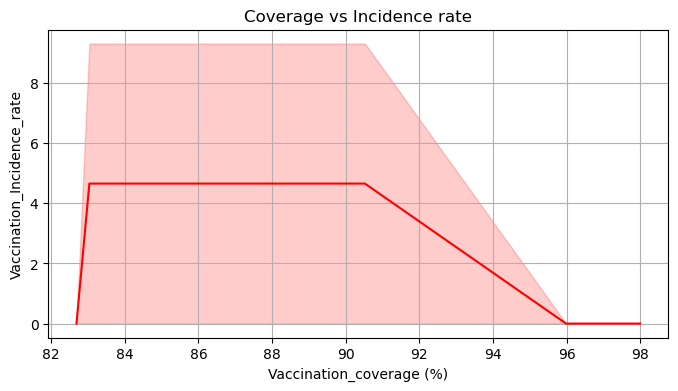

In [62]:
#coverage vs incidence rate
plt.figure(figsize=(8,4))
sns.lineplot(x="COVERAGE",y="INCIDENCE_RATE",data=inc_cov,c='r')
plt.title("Coverage vs Incidence rate")
plt.xlabel("Vaccination_coverage (%)")
plt.ylabel("Vaccination_Incidence_rate")
plt.grid()
plt.show()

In [68]:
# 2. What is the drop-off rate between 1st dose and subsequent doses?.
dose_coverage=cov.groupby('DOSES')['COVERAGE'].sum().sort_index()
dose_coverage

DOSES
-2.222882e+08       262.00
-3.333000e+03      2732.06
 0.000000e+00    588395.05
 1.000000e+00     46811.88
 1.050000e+00       161.54
                   ...    
 1.251126e+08        89.00
 1.258694e+08        90.00
 1.259833e+08        89.00
 1.265353e+08        89.00
 1.266052e+08        90.00
Name: COVERAGE, Length: 53792, dtype: float64

In [70]:
first_dose=dose_coverage.loc[0]
drop_off_rates=((first_dose-dose_coverage)/dose_coverage)*100
drop_off_rates

DOSES
-2.222882e+08    224478.263359
-3.333000e+03     21436.681112
 0.000000e+00         0.000000
 1.000000e+00      1156.935312
 1.050000e+00    364141.085799
                     ...      
 1.251126e+08    661018.033708
 1.258694e+08    653672.277778
 1.259833e+08    661018.033708
 1.265353e+08    661018.033708
 1.266052e+08    653672.277778
Name: COVERAGE, Length: 53792, dtype: float64

In [90]:
# 3. Are vaccination rates different between genders?
strategy_comp['VACCINATION_RATE']=(strategy_comp['DOSES']/strategy_comp['TARGET_NUMBER'])*100

In [94]:
strategy_comp['VACCINATION_RATE']

WHO_REGION  STRATEGY                      
AFRO        Mass_vaccination                  72.836234
AMRO        Centralized                       64.098300
EMRO        Target Vaccination                 8.692677
EURO        Door-to-Door                      75.409942
SEARO       Virtual or Online Registration    37.124970
WPRO        Vaccination via school            54.434167
Name: VACCINATION_RATE, dtype: float64

In [30]:
vacc_rate=(cov['DOSES']/cov['TARGET_NUMBER'])*100

In [32]:
vacc_rate

0         90.517241
1         90.517241
2         90.517241
3         82.690730
4         82.690730
            ...    
399854     4.327286
399855     6.147629
399856     4.640766
399857     0.144043
399858          NaN
Length: 399859, dtype: float64

In [34]:
gender_data= sch[sch['TARGETPOP'].isin(['FEMALE','MALE','BOTH'])]

In [36]:
gender_cov=gender_data.groupby('TARGETPOP')['YEAR'].sum()
gender_cov

TARGETPOP
BOTH       297379.0
FEMALE    1092366.0
Name: YEAR, dtype: float64

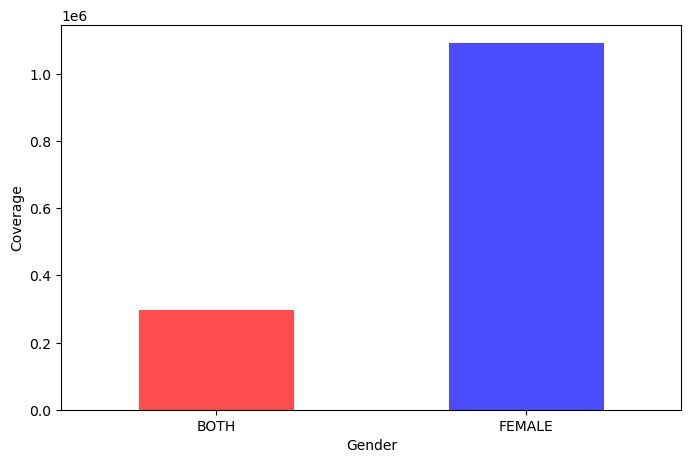

In [38]:
plt.figure(figsize=(8,5))
gender_cov.plot(kind='bar',color=['red','blue'],alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Coverage")
plt.xticks(rotation=0)
plt.show()

In [40]:
#4. How does education level impact vaccination rates?
COVERAGE_CATEGORY=cov['COVERAGE_CATEGORY'].value_counts()

In [42]:
COV_CATE_concat_vacc_rate = pd.concat([vacc_rate, COVERAGE_CATEGORY], axis=1)


In [ ]:
plt.figure(figsize=(10,6))

# Use the concatenated DataFrame and explicitly pass it to `sns.lineplot`
COV_CATE_concat_vacc_rate.plot(kind='bar',color=['red','blue'],alpha=0.7)
# Add title and labels
plt.title('Booster Dose Update Over Time', fontsize=16)
plt.xlabel('COVERAGE_CATEGORY', fontsize=12)
plt.ylabel('vacc_rate', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# 5. What is the urban vs. rural vaccination rate difference?


In [20]:
# 6 Has the rate of booster dose uptake increased over time?
booster_dose=sch[sch['TARGETPOP'].isin(['B_2YL_W','B_CHILD_W','B_ADO_W'])]
booster_dose['YEAR']=pd.to_numeric(booster_dose['YEAR'],errors='coerce')
booster_cov=booster_dose.groupby('TARGETPOP')['YEAR'].sum()
booster_cov


TARGETPOP
B_2YL_W      748467.0
B_ADO_W      608902.0
B_CHILD_W    932544.0
Name: YEAR, dtype: float64

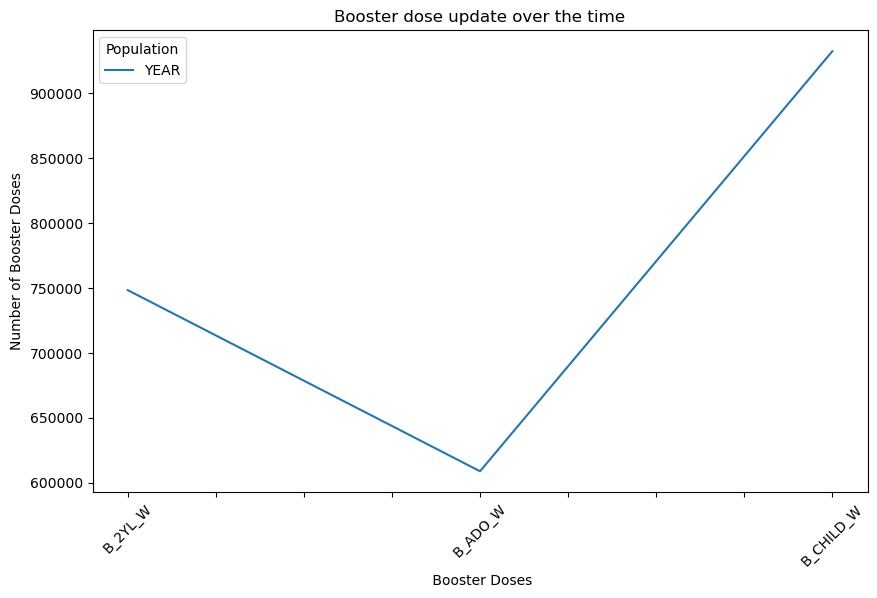

In [22]:
plt.figure(figsize=(10,6))
booster_cov.plot(kind='line')
plt.title('Booster dose update over the time')
plt.xlabel(' Booster Doses')
plt.ylabel('Number of Booster Doses')
plt.legend(title='Population')
plt.xticks(rotation=45)
plt.show()

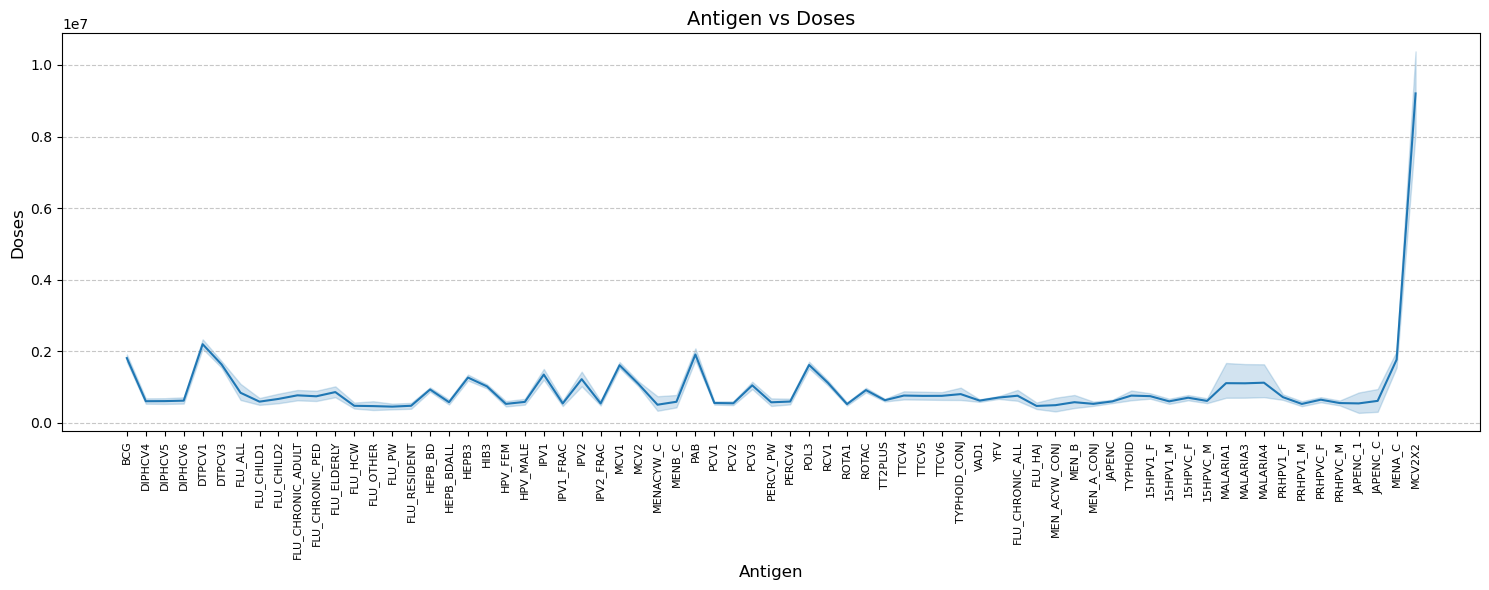

In [10]:
#antigen and doses
# 7 Is there a seasonal pattern in vaccination uptake?
plt.figure(figsize=(15,6))
sns.lineplot(x="ANTIGEN",y="DOSES",data=cov)
# Rotate x-axis labels and set font size
plt.xticks(rotation=90, fontsize=8)  # Adjust rotation and font size for readability
plt.xlabel("Antigen", fontsize=12)  # Label the x-axis
plt.ylabel("Doses", fontsize=12)    # Label the y-axis
plt.title("Antigen vs Doses", fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 8. How does population density relate to vaccination coverage?
plt.figure(figsize=(12,6))
sns.lineplot(x="DOSES",y="COVERAGE", data=cov)
plt.xlabel("NUMBER OF DOSES")
plt.ylabel("COVERAGE ")
plt.grid(True)
plt.show()

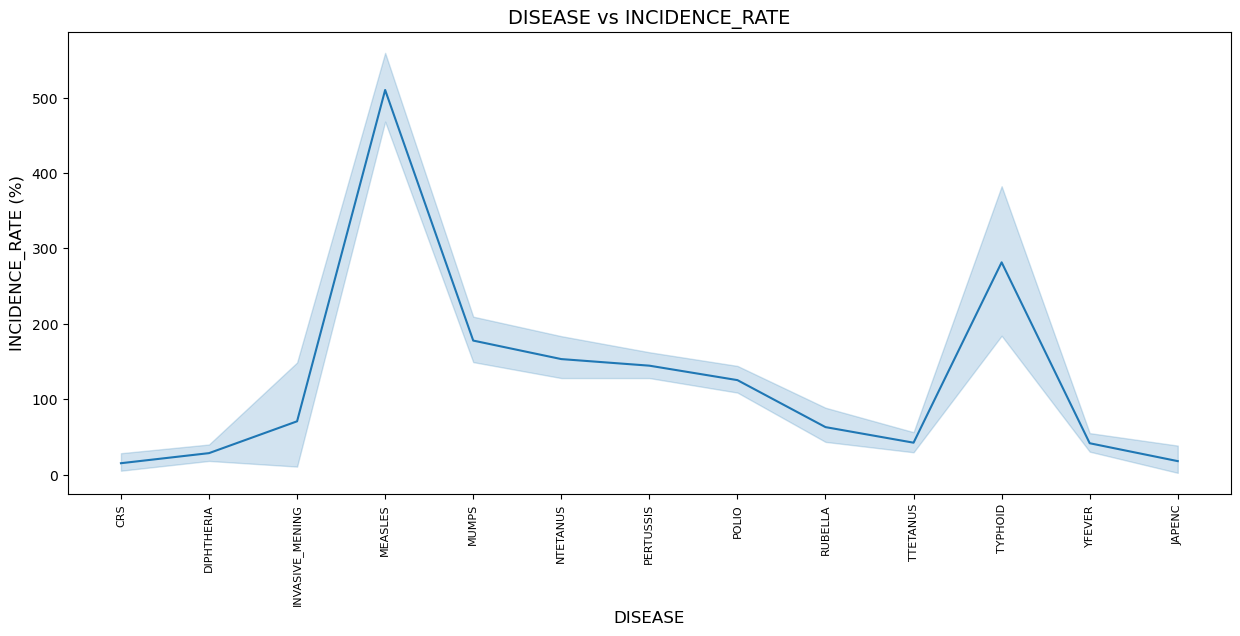

In [11]:
# 9 How do vaccination rates correlate with a decrease in disease incidence?
plt.figure(figsize=(15,6))
sns.lineplot(x="DISEASE",y="INCIDENCE_RATE",data=inc)
# Rotate x-axis labels and set font size
plt.xticks(rotation=90, fontsize=8)  # Adjust rotation and font size for readability
plt.xlabel("DISEASE", fontsize=12)  # Label the x-axis
plt.ylabel("INCIDENCE_RATE (%)", fontsize=12)    # Label the y-axis
plt.title("DISEASE vs INCIDENCE_RATE", fontsize=14)  
plt.show()

In [ ]:
 # 10 Which regions have high disease incidence despite high vaccination rates?
combine_vacc_rate_andIncidence=pd.merge(inc,vacc_rate,how='inner')


In [ ]:
plt.figure(figsize=(12, 6))


sns.barplot(x='Region', y='Vaccination_Rate', data=combine_vacc_rate_andIncidence, color='blue', alpha=0.6, label='Vaccination Rate')
sns.barplot(x='Region', y='Incidence_Rate', data=combine_vacc_rate_andIncidence, color='red', alpha=0.6, label='Incidence Rate')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Rate')
plt.title('Vaccination Rate and Incidence Rate by Region')
plt.legend()

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()
